# Обработка датафрейма и заполнение пропусков

В данном файле покажу, как можно обработать датафрейме для обучения **линейной модели**. В будущем эта модель будет обучена методами **градиентного спуска** и **аналитическим методом** решения линейной регрессии

На первых шагах импортируем необходимые библиотеки и считываем 2 файла -  `test.csv` и `train.csv`. Так же объединим их в один датафрейм, чтобы заполнить пропуски и **категориальные** перeменные перевести в **вещественные**, чтобы наша модель работала

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
test_train = pd.concat([train_df, test_df])
test_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [6]:
test_train.set_index('Id', inplace=True)

In [8]:
test_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal   208500.0  
2        0      5    2007        WD         Normal   181500.0  
3        0      9    2008        WD         Normal   223500.0  
4        0      2    2006        WD        Abnorml   140000.0  
5        0     12    2008        WD         Normal   250000.0  

[5 rows x 80 columns]

Теперь выведем всю информацию о датафрейме. Удалим сразу колонки, связанные с **годом продажи (MoSold)** и **месяцем продажи (YrSold)**, так как они **неизвестны** нам на момент предсказания

In [11]:
test_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [13]:
test_train.drop(['YrSold', 'MoSold'], axis=1, inplace=True)

In [15]:
test_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Теперь разобьем наши колонки на **категориальные и вещественные**.

**Категориальные** - это те колонки, в которых содержится строковый тип данных, либо количество уникальных значений небольшое.

**Вещественныe** - в них содержится числовой тип данных и достаточно много уникальных значений.

Нам необходимо учитывать, что в колонках с типом данных **int** могут содержаться категориальные переменные. В описании данных сказано, что: если в колонке максимум 16 уникальных элементов, то ее считаем категориальной

Описание переменных:
1) `cat_columns` - все колонки с типом **object**
2) `large_cat_columns` - колонки категориальные с количеством уникальных значений больше 16 
3) `small_cat_columns` - колонки категориальные с количеством уникальных значений меньше или равно 16
4) `int_float_columns` - вещественные колонки с типами данных **int** и **float**

In [18]:
cat_columns = [col for col in test_train.columns if test_train[col].dtype == 'object']
large_cat_columns = [col for col in cat_columns if test_train[col].nunique() > 16]
small_cat_columns = [col for col in cat_columns if test_train[col].nunique() <= 16]
int_float_columns = [col for col in test_train.columns if test_train[col].dtype != 'object']

In [20]:
cat_columns = small_cat_columns

Теперь просуммируем количество колонок начального датафрейма и количество колонок, которое мы из него вытащили

In [23]:
test_train.shape[1]

78

In [25]:
test_train[cat_columns].shape[1] + test_train[int_float_columns].shape[1] + test_train[large_cat_columns].shape[1]

78

Теперь перейдем к категориальным колонкам, изучим их распределение, построим графики, сделаем выводы. Будем удалять те колонки, где признаки распределены сильно неравномерно, то есть какой-то признак в 10-ки раз превосходит другой.

`our_distr` - функция, которая принимает датафрейм и столбец, группирует по столбцу и аггрегирует по сумме. Считает количество вхождений каждого значения, и считает его долю в распределении (стобец **part**)

In [28]:
def our_distr(df, col):
    new_df = df.groupby(col).agg({col: 'count'})
    new_df['Part'] = new_df[col] / len(df)
    print(new_df)
    sns.countplot(x=df[col], data=df, palette='viridis', hue=col, legend=False)
    plt.show()

              Neighborhood      Part
Neighborhood                        
Blmngtn                 28  0.009592
Blueste                 10  0.003426
BrDale                  30  0.010277
BrkSide                108  0.036999
ClearCr                 44  0.015074
CollgCr                267  0.091470
Crawfor                103  0.035286
Edwards                194  0.066461
Gilbert                165  0.056526
IDOTRR                  93  0.031860
MeadowV                 37  0.012676
Mitchel                114  0.039054
NAmes                  443  0.151764
NPkVill                 23  0.007879
NWAmes                 131  0.044878
NoRidge                 71  0.024323
NridgHt                166  0.056869
OldTown                239  0.081877
SWISU                   48  0.016444
Sawyer                 151  0.051730
SawyerW                125  0.042823
Somerst                182  0.062350
StoneBr                 51  0.017472
Timber                  72  0.024666
Veenker                 24  0.008222


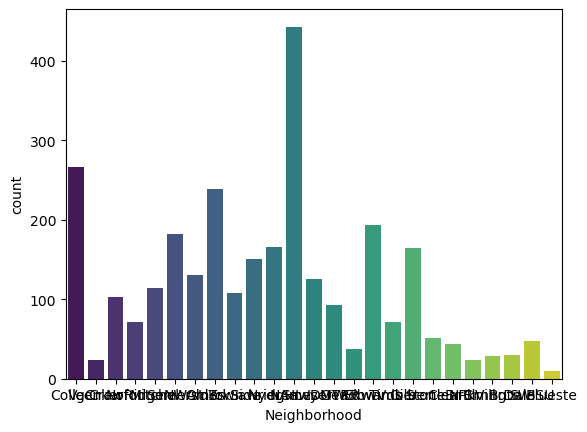

In [30]:
for col in large_cat_columns:
    our_distr(test_train, col)

В категориальной колонке с большим количеством уникальных значений все хорошо и нет аномалий. Поэтому идем дальше

          MSZoning      Part
MSZoning                    
C (all)         25  0.008565
FV             139  0.047619
RH              26  0.008907
RL            2265  0.775951
RM             460  0.157588


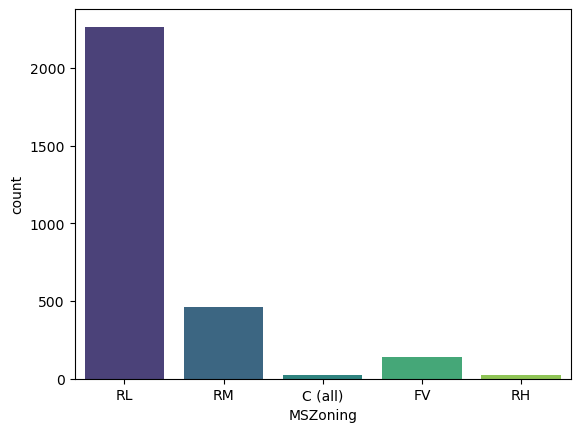

        Street      Part
Street                  
Grvl        12  0.004111
Pave      2907  0.995889


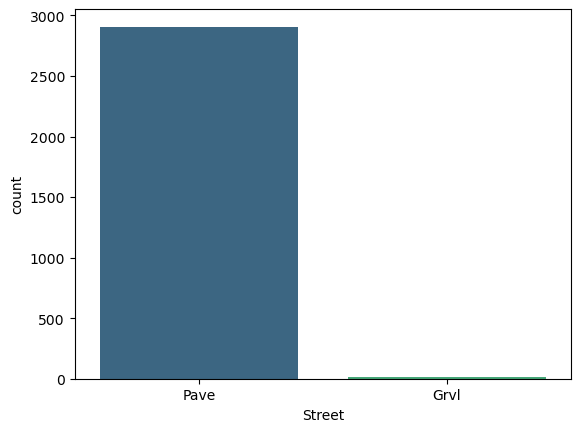

       Alley      Part
Alley                 
Grvl     120  0.041110
Pave      78  0.026721


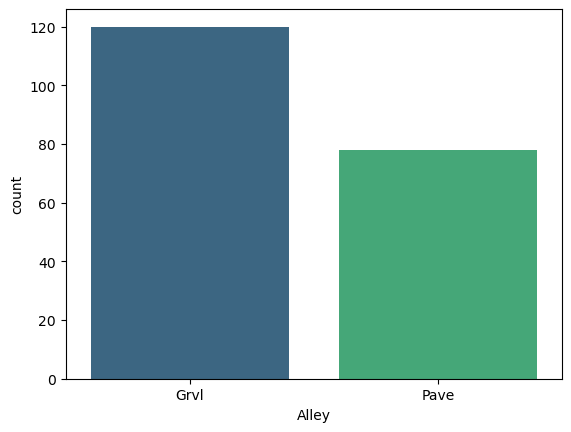

          LotShape      Part
LotShape                    
IR1            968  0.331620
IR2             76  0.026036
IR3             16  0.005481
Reg           1859  0.636862


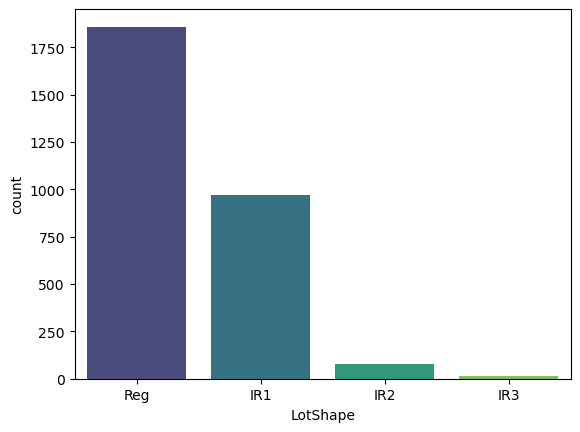

             LandContour      Part
LandContour                       
Bnk                  117  0.040082
HLS                  120  0.041110
Low                   60  0.020555
Lvl                 2622  0.898253


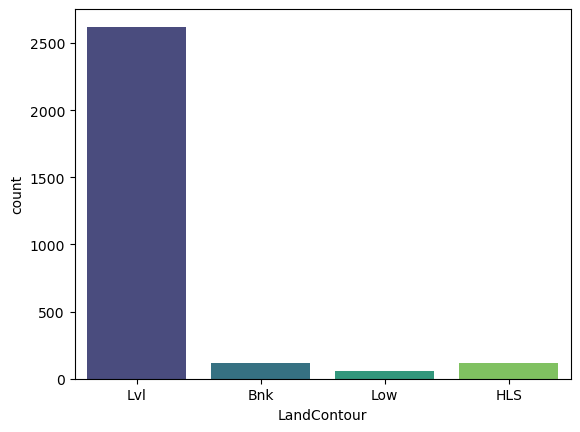

           Utilities      Part
Utilities                     
AllPub          2916  0.998972
NoSeWa             1  0.000343


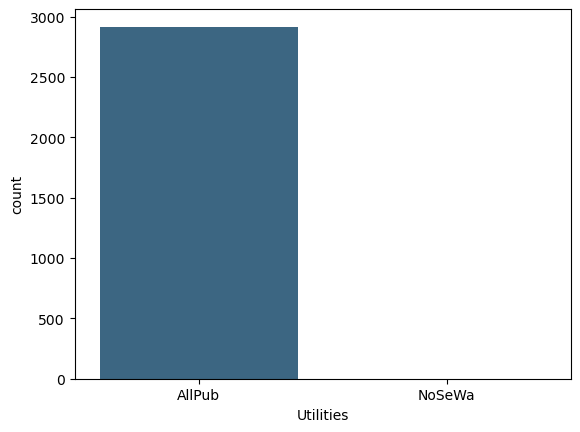

           LotConfig      Part
LotConfig                     
Corner           511  0.175060
CulDSac          176  0.060295
FR2               85  0.029120
FR3               14  0.004796
Inside          2133  0.730730


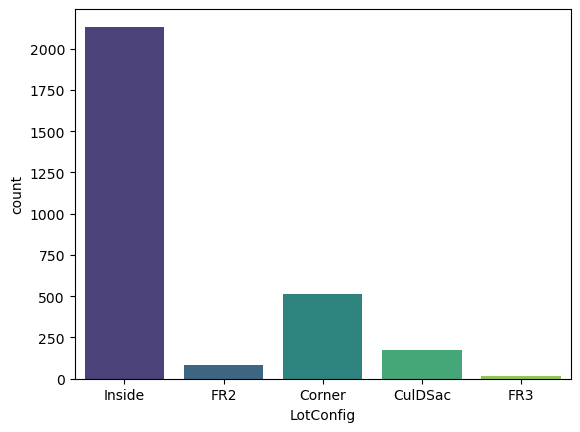

           LandSlope      Part
LandSlope                     
Gtl             2778  0.951696
Mod              125  0.042823
Sev               16  0.005481


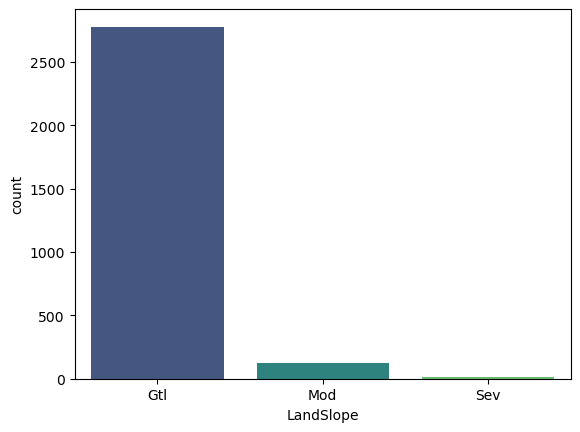

            Condition1      Part
Condition1                      
Artery              92  0.031518
Feedr              164  0.056184
Norm              2511  0.860226
PosA                20  0.006852
PosN                39  0.013361
RRAe                28  0.009592
RRAn                50  0.017129
RRNe                 6  0.002055
RRNn                 9  0.003083


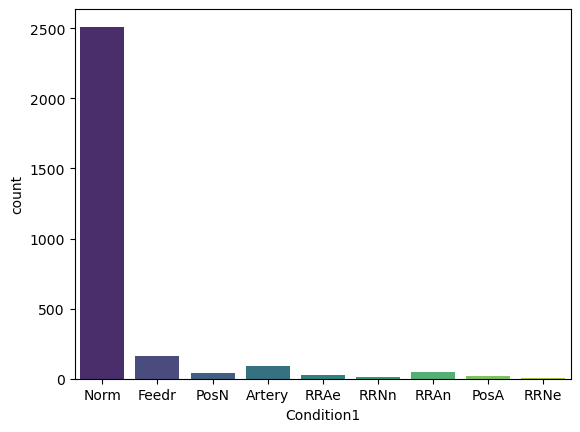

            Condition2      Part
Condition2                      
Artery               5  0.001713
Feedr               13  0.004454
Norm              2889  0.989723
PosA                 4  0.001370
PosN                 4  0.001370
RRAe                 1  0.000343
RRAn                 1  0.000343
RRNn                 2  0.000685


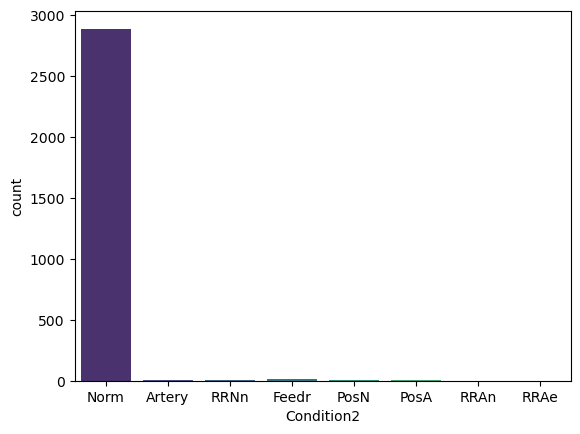

          BldgType      Part
BldgType                    
1Fam          2425  0.830764
2fmCon          62  0.021240
Duplex         109  0.037342
Twnhs           96  0.032888
TwnhsE         227  0.077766


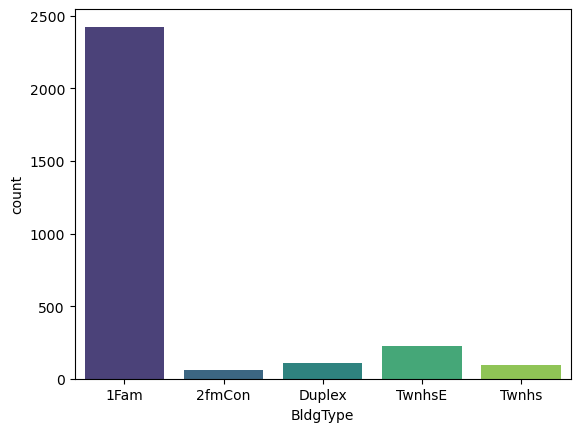

            HouseStyle      Part
HouseStyle                      
1.5Fin             314  0.107571
1.5Unf              19  0.006509
1Story            1471  0.503940
2.5Fin               8  0.002741
2.5Unf              24  0.008222
2Story             872  0.298732
SFoyer              83  0.028434
SLvl               128  0.043851


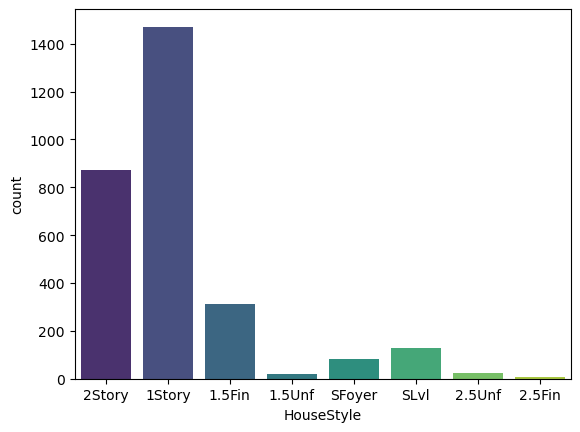

           RoofStyle      Part
RoofStyle                     
Flat              20  0.006852
Gable           2310  0.791367
Gambrel           22  0.007537
Hip              551  0.188763
Mansard           11  0.003768
Shed               5  0.001713


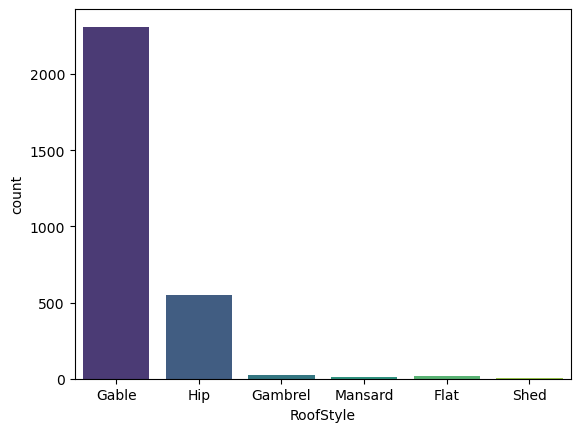

          RoofMatl      Part
RoofMatl                    
ClyTile          1  0.000343
CompShg       2876  0.985269
Membran          1  0.000343
Metal            1  0.000343
Roll             1  0.000343
Tar&Grv         23  0.007879
WdShake          9  0.003083
WdShngl          7  0.002398


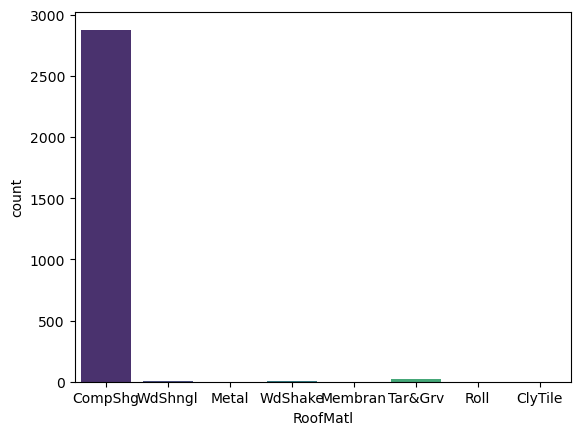

             Exterior1st      Part
Exterior1st                       
AsbShng               44  0.015074
AsphShn                2  0.000685
BrkComm                6  0.002055
BrkFace               87  0.029805
CBlock                 2  0.000685
CemntBd              126  0.043165
HdBoard              442  0.151422
ImStucc                1  0.000343
MetalSd              450  0.154162
Plywood              221  0.075711
Stone                  2  0.000685
Stucco                43  0.014731
VinylSd             1025  0.351148
Wd Sdng              411  0.140802
WdShing               56  0.019185


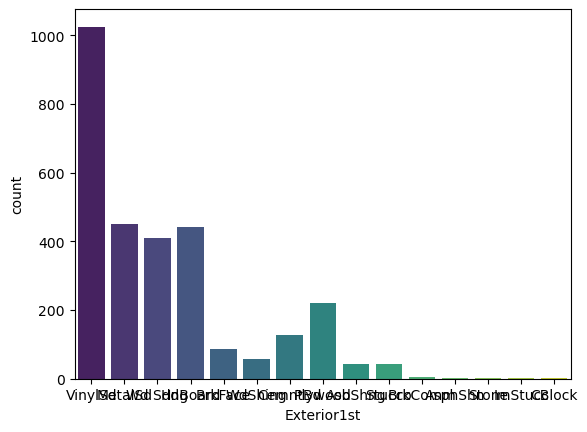

             Exterior2nd      Part
Exterior2nd                       
AsbShng               38  0.013018
AsphShn                4  0.001370
Brk Cmn               22  0.007537
BrkFace               47  0.016101
CBlock                 3  0.001028
CmentBd              126  0.043165
HdBoard              406  0.139089
ImStucc               15  0.005139
MetalSd              447  0.153135
Other                  1  0.000343
Plywood              270  0.092497
Stone                  6  0.002055
Stucco                47  0.016101
VinylSd             1014  0.347379
Wd Sdng              391  0.133950
Wd Shng               81  0.027749


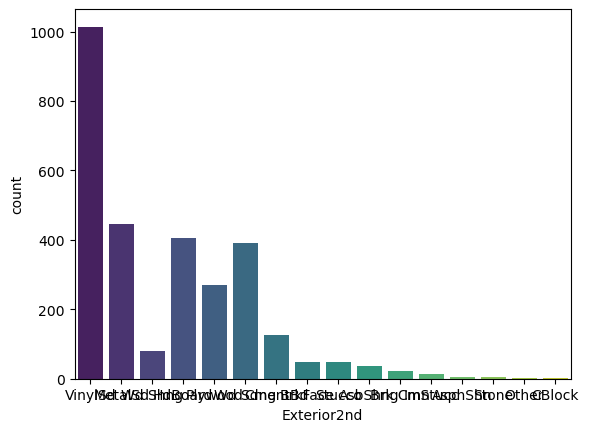

            MasVnrType      Part
MasVnrType                      
BrkCmn              25  0.008565
BrkFace            879  0.301131
Stone              249  0.085303


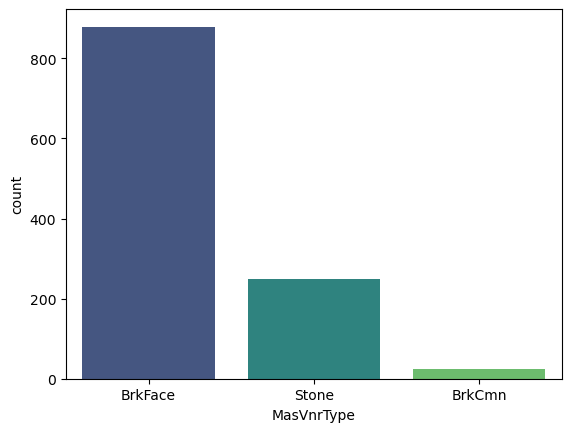

           ExterQual      Part
ExterQual                     
Ex               107  0.036656
Fa                35  0.011990
Gd               979  0.335389
TA              1798  0.615964


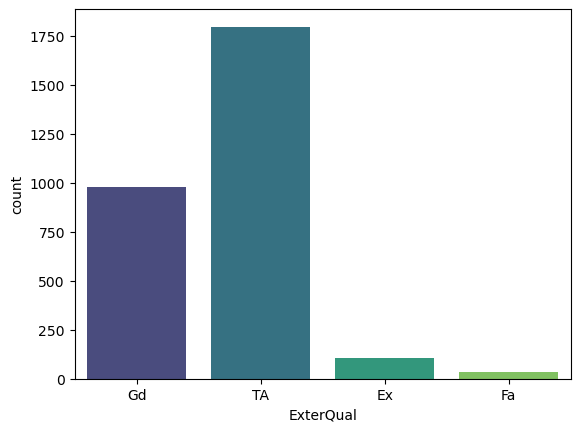

           ExterCond      Part
ExterCond                     
Ex                12  0.004111
Fa                67  0.022953
Gd               299  0.102432
Po                 3  0.001028
TA              2538  0.869476


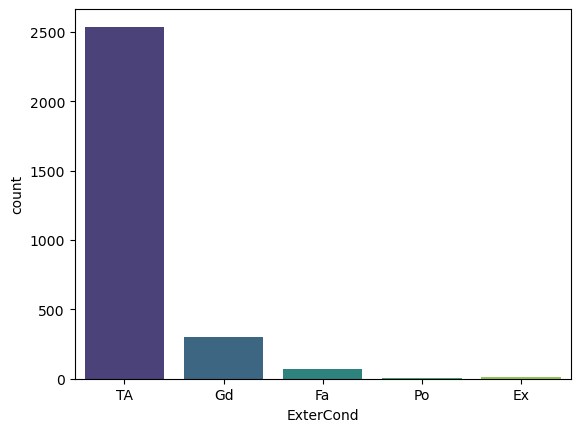

            Foundation      Part
Foundation                      
BrkTil             311  0.106543
CBlock            1235  0.423090
PConc             1308  0.448099
Slab                49  0.016787
Stone               11  0.003768
Wood                 5  0.001713


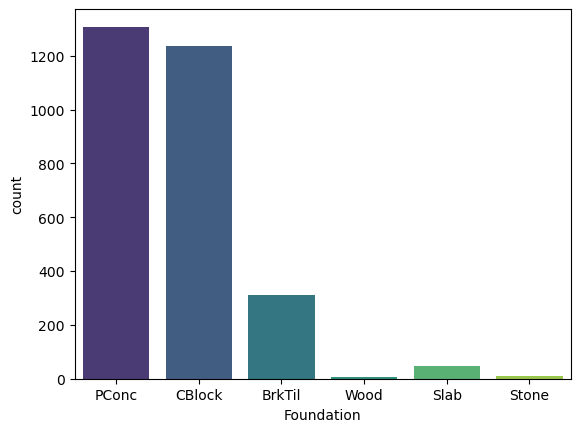

          BsmtQual      Part
BsmtQual                    
Ex             258  0.088386
Fa              88  0.030147
Gd            1209  0.414183
TA            1283  0.439534


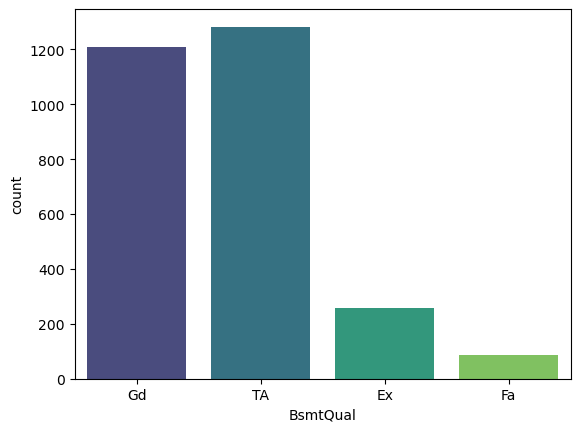

          BsmtCond      Part
BsmtCond                    
Fa             104  0.035629
Gd             122  0.041795
Po               5  0.001713
TA            2606  0.892771


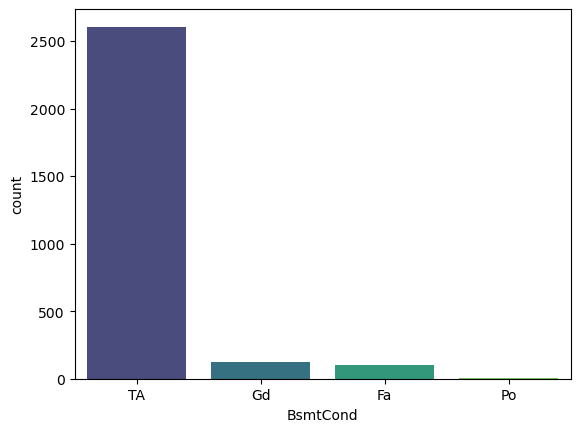

              BsmtExposure      Part
BsmtExposure                        
Av                     418  0.143200
Gd                     276  0.094553
Mn                     239  0.081877
No                    1904  0.652278


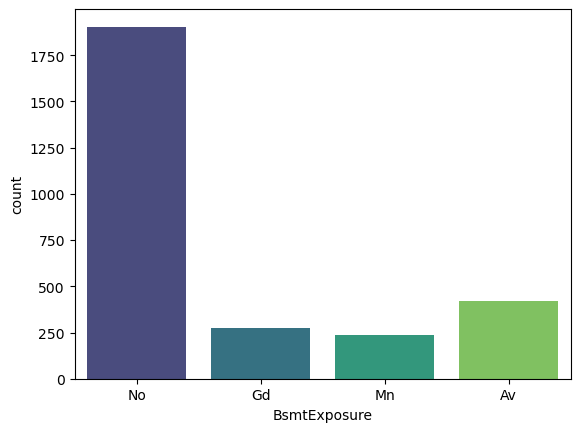

              BsmtFinType1      Part
BsmtFinType1                        
ALQ                    429  0.146968
BLQ                    269  0.092155
GLQ                    849  0.290853
LwQ                    154  0.052758
Rec                    288  0.098664
Unf                    851  0.291538


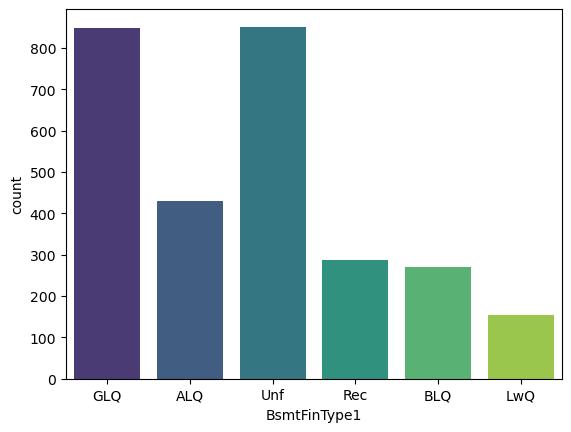

              BsmtFinType2      Part
BsmtFinType2                        
ALQ                     52  0.017814
BLQ                     68  0.023296
GLQ                     34  0.011648
LwQ                     87  0.029805
Rec                    105  0.035971
Unf                   2493  0.854060


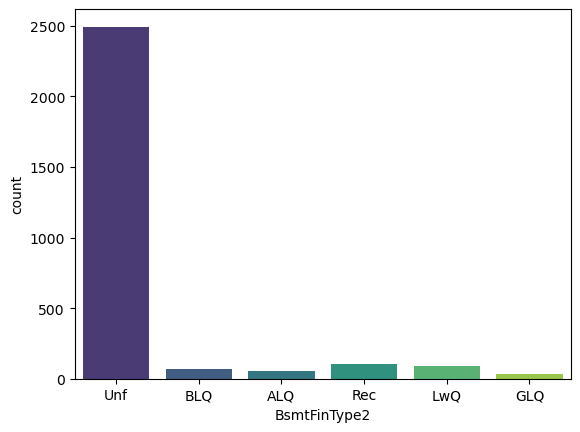

         Heating      Part
Heating                   
Floor          1  0.000343
GasA        2874  0.984584
GasW          27  0.009250
Grav           9  0.003083
OthW           2  0.000685
Wall           6  0.002055


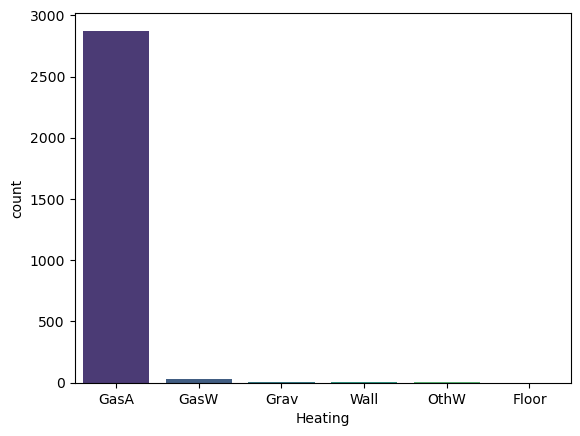

           HeatingQC      Part
HeatingQC                     
Ex              1493  0.511477
Fa                92  0.031518
Gd               474  0.162384
Po                 3  0.001028
TA               857  0.293594


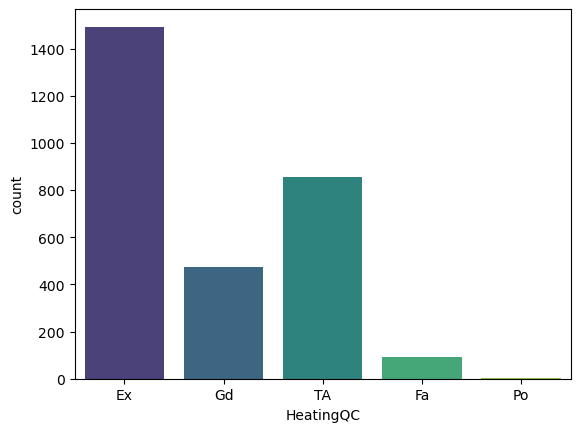

            CentralAir      Part
CentralAir                      
N                  196  0.067146
Y                 2723  0.932854


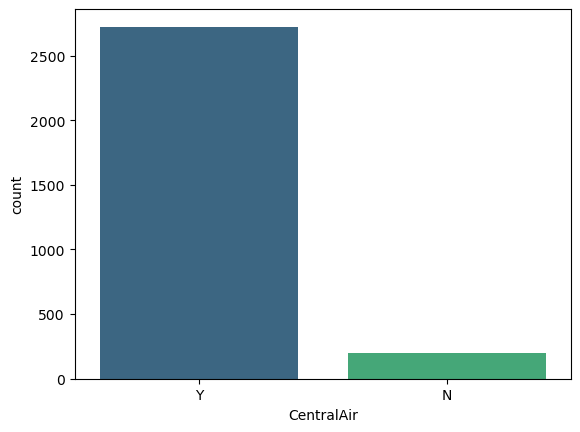

            Electrical      Part
Electrical                      
FuseA              188  0.064406
FuseF               50  0.017129
FuseP                8  0.002741
Mix                  1  0.000343
SBrkr             2671  0.915039


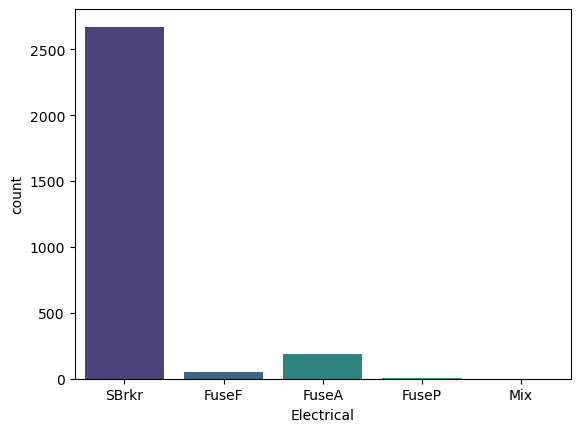

             KitchenQual      Part
KitchenQual                       
Ex                   205  0.070230
Fa                    70  0.023981
Gd                  1151  0.394313
TA                  1492  0.511134


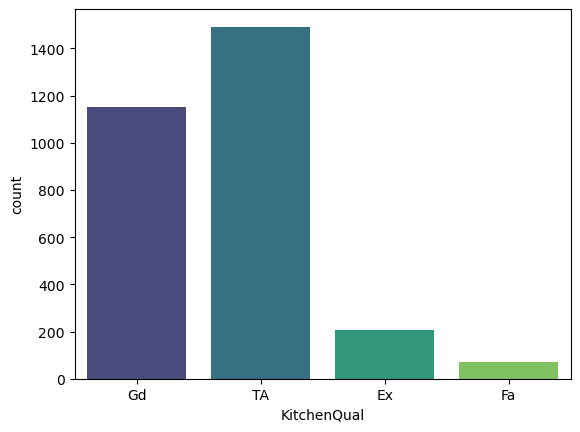

            Functional      Part
Functional                      
Maj1                19  0.006509
Maj2                 9  0.003083
Min1                65  0.022268
Min2                70  0.023981
Mod                 35  0.011990
Sev                  2  0.000685
Typ               2717  0.930798


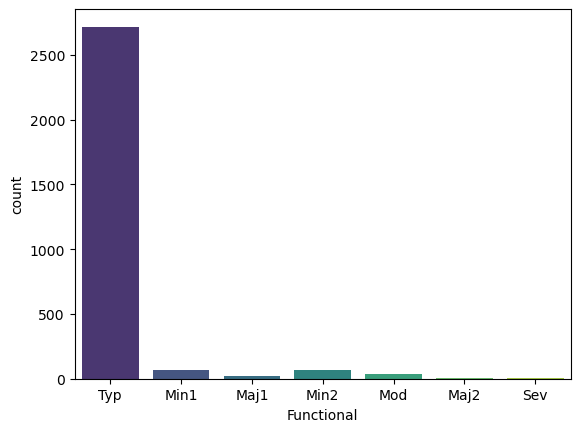

             FireplaceQu      Part
FireplaceQu                       
Ex                    43  0.014731
Fa                    74  0.025351
Gd                   744  0.254882
Po                    46  0.015759
TA                   592  0.202809


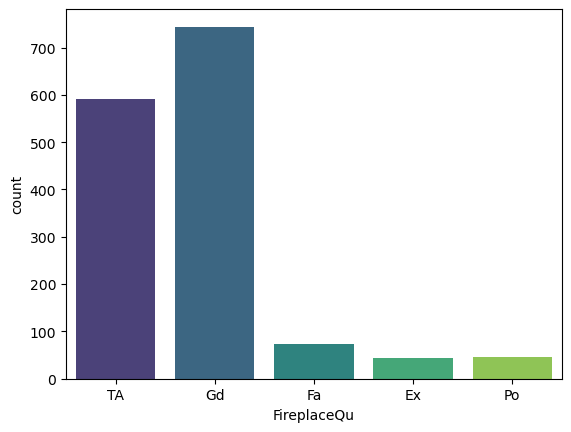

            GarageType      Part
GarageType                      
2Types              23  0.007879
Attchd            1723  0.590271
Basment             36  0.012333
BuiltIn            186  0.063720
CarPort             15  0.005139
Detchd             779  0.266872


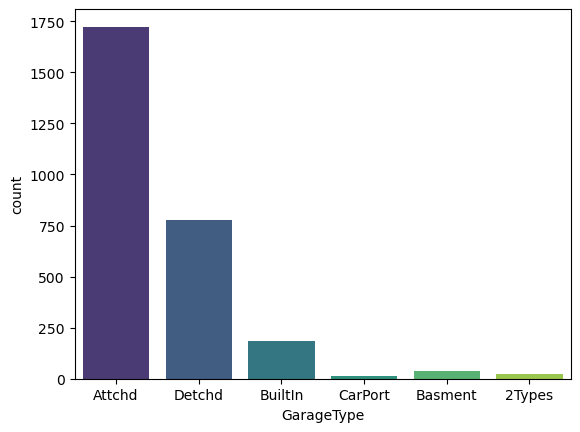

              GarageFinish      Part
GarageFinish                        
Fin                    719  0.246317
RFn                    811  0.277835
Unf                   1230  0.421377


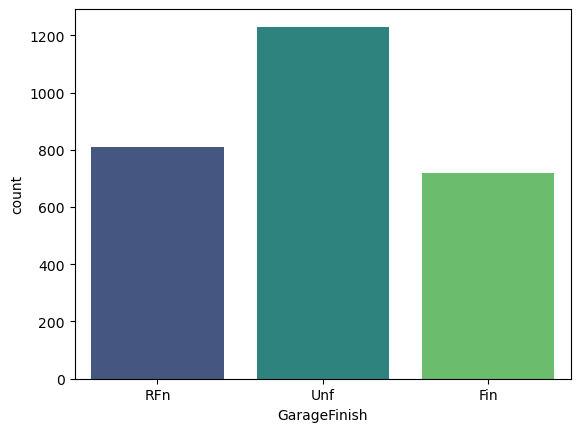

            GarageQual      Part
GarageQual                      
Ex                   3  0.001028
Fa                 124  0.042480
Gd                  24  0.008222
Po                   5  0.001713
TA                2604  0.892086


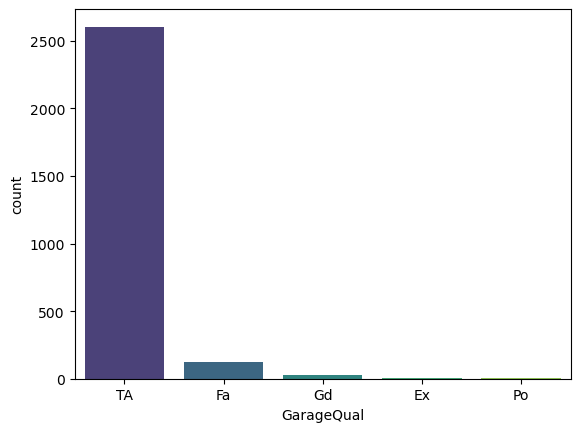

            GarageCond      Part
GarageCond                      
Ex                   3  0.001028
Fa                  74  0.025351
Gd                  15  0.005139
Po                  14  0.004796
TA                2654  0.909215


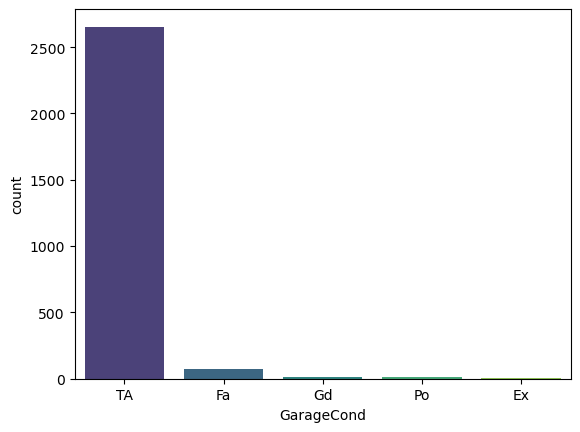

            PavedDrive      Part
PavedDrive                      
N                  216  0.073998
P                   62  0.021240
Y                 2641  0.904762


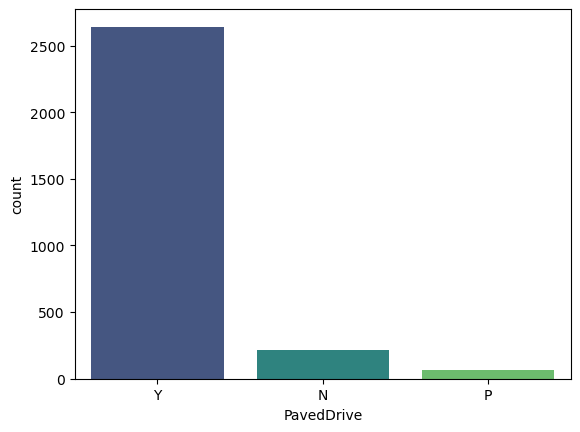

        PoolQC      Part
PoolQC                  
Ex           4  0.001370
Fa           2  0.000685
Gd           4  0.001370


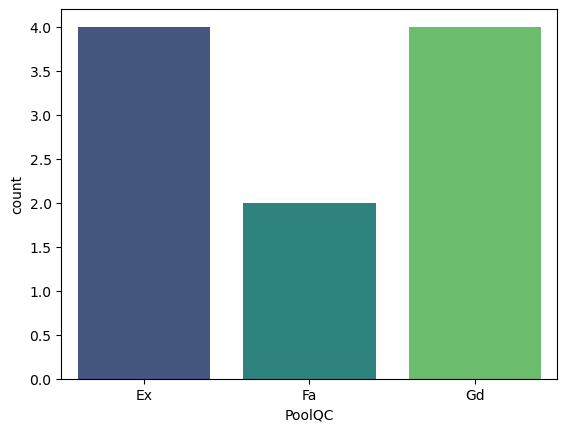

       Fence      Part
Fence                 
GdPrv    118  0.040425
GdWo     112  0.038369
MnPrv    329  0.112710
MnWw      12  0.004111


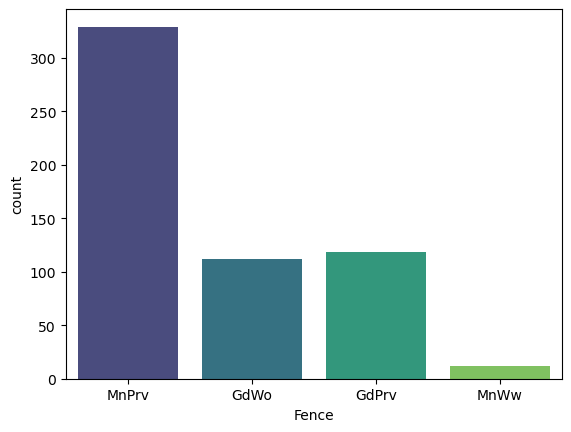

             MiscFeature      Part
MiscFeature                       
Gar2                   5  0.001713
Othr                   4  0.001370
Shed                  95  0.032545
TenC                   1  0.000343


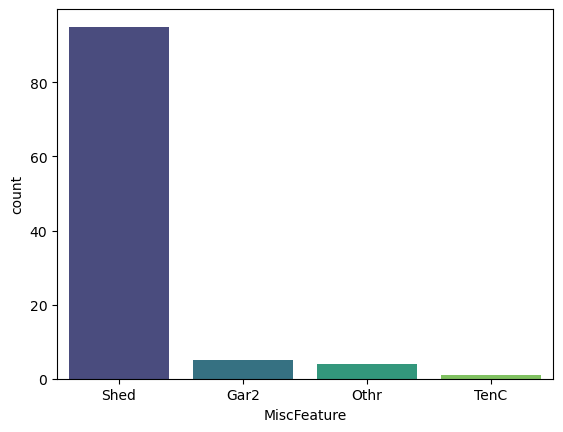

          SaleType      Part
SaleType                    
COD             87  0.029805
CWD             12  0.004111
Con              5  0.001713
ConLD           26  0.008907
ConLI            9  0.003083
ConLw            8  0.002741
New            239  0.081877
Oth              7  0.002398
WD            2525  0.865022


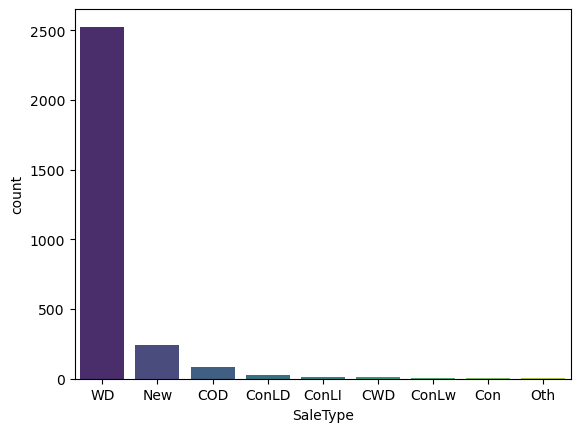

               SaleCondition      Part
SaleCondition                         
Abnorml                  190  0.065091
AdjLand                   12  0.004111
Alloca                    24  0.008222
Family                    46  0.015759
Normal                  2402  0.822885
Partial                  245  0.083933


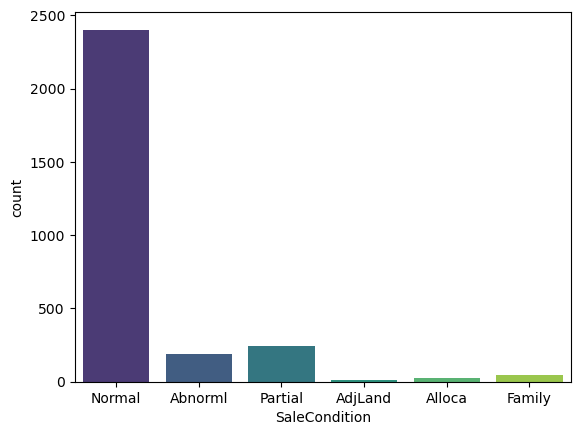

In [33]:
for col in cat_columns:
    our_distr(test_train, col)

Посмотрев и проанализировав графики, можно заметить, что в колонках **Street, Utilities, Condition2, RoofMatl, Heating** данные распределны аномально. Но лучше еще построить график **boxplot** для каждого стобца, чтобы точно убедиться, какие данные мы удалим из нашего датафрейма

In [35]:
def draw_boxplot(df, col):
    sns.boxplot(data=df, x='SalePrice', y=col, palette='viridis', hue=col, legend=False)
    plt.show()

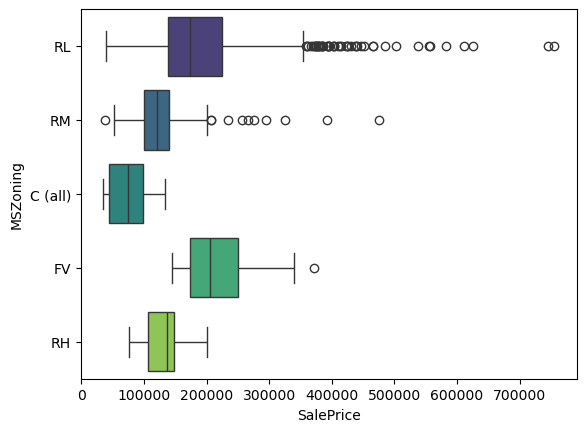

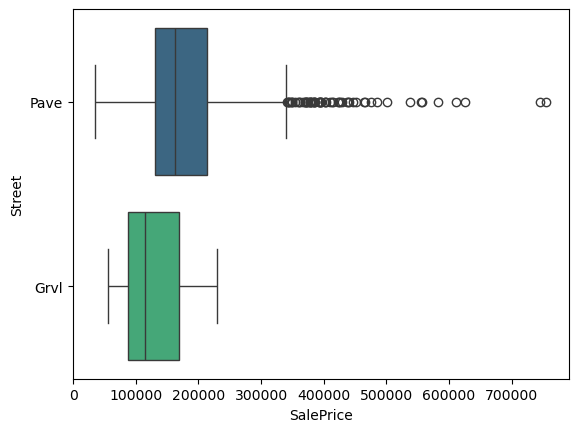

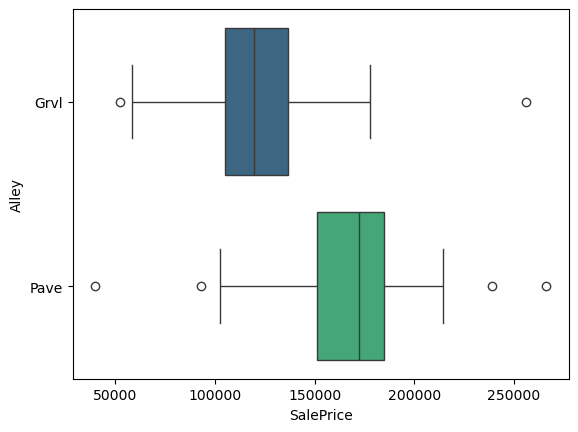

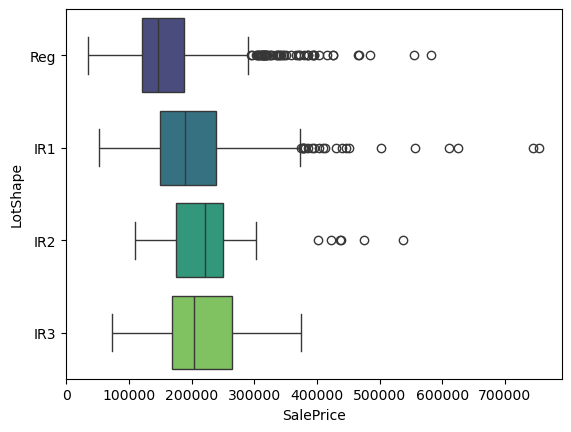

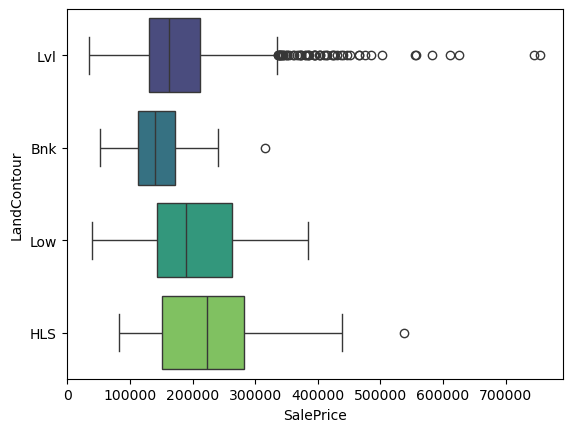

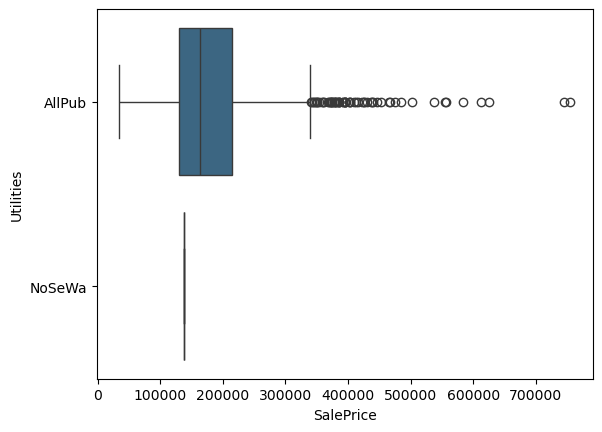

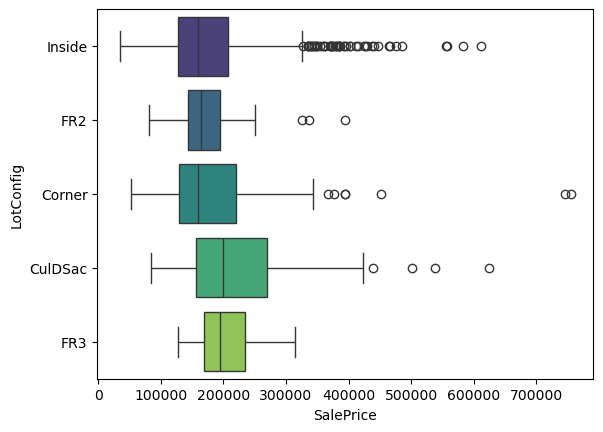

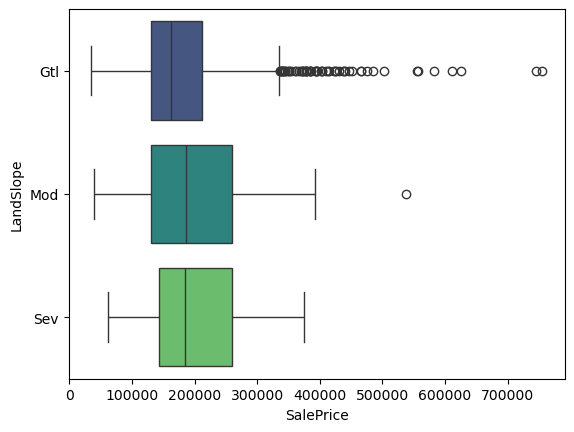

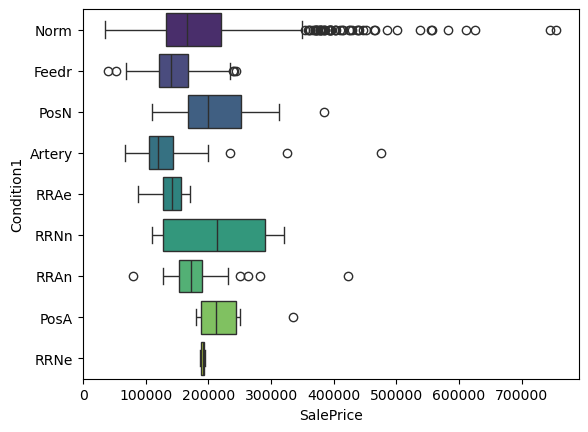

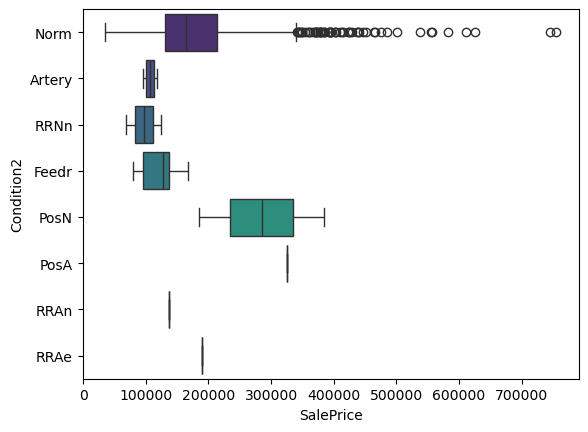

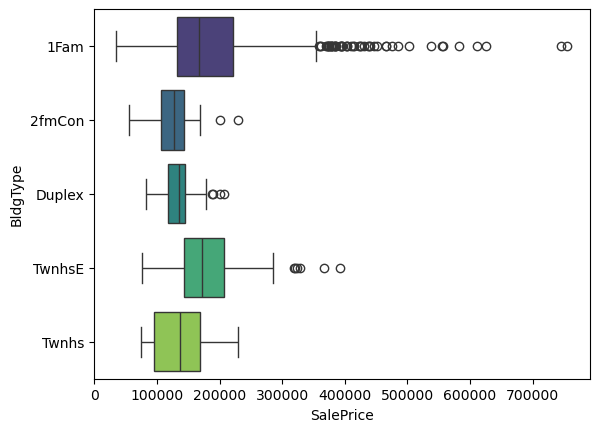

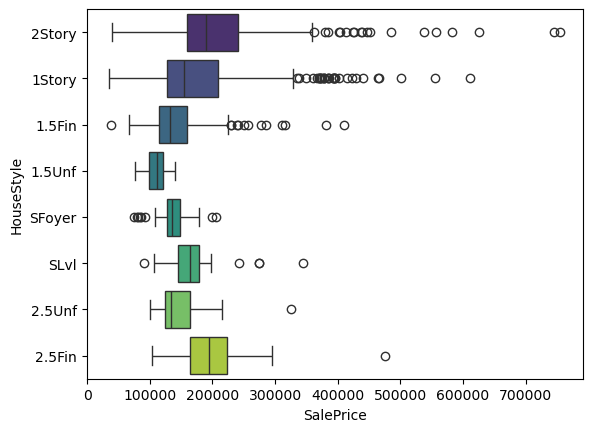

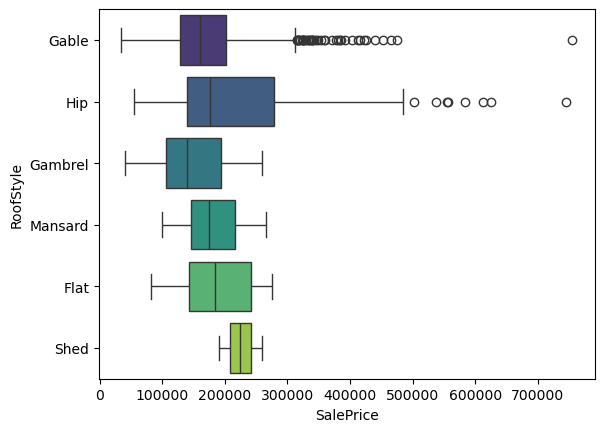

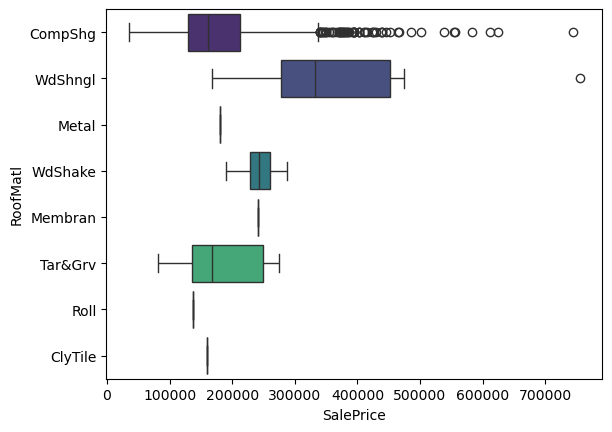

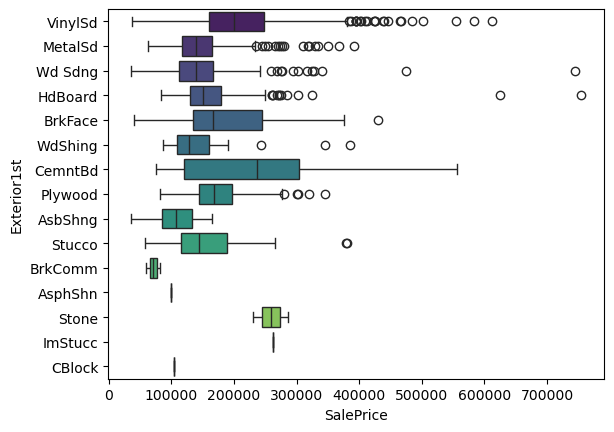

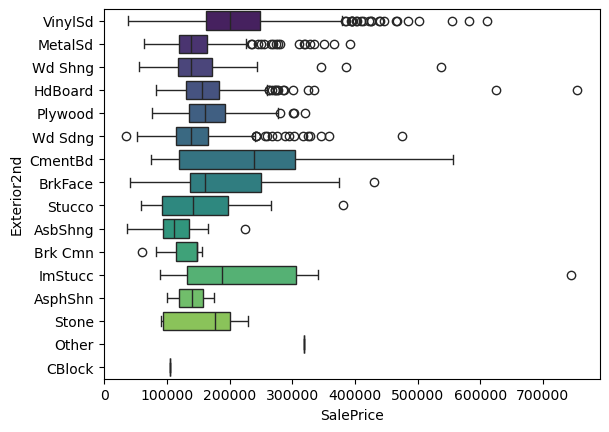

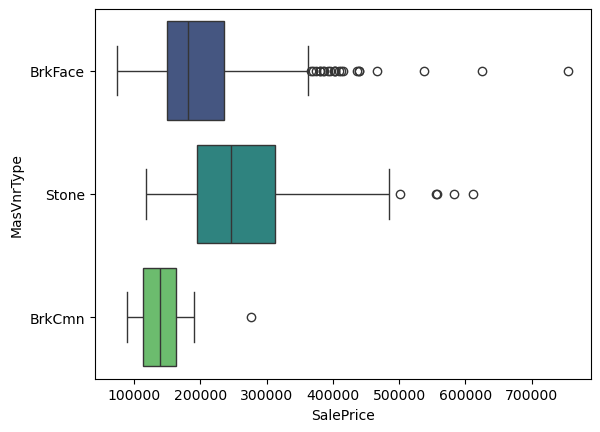

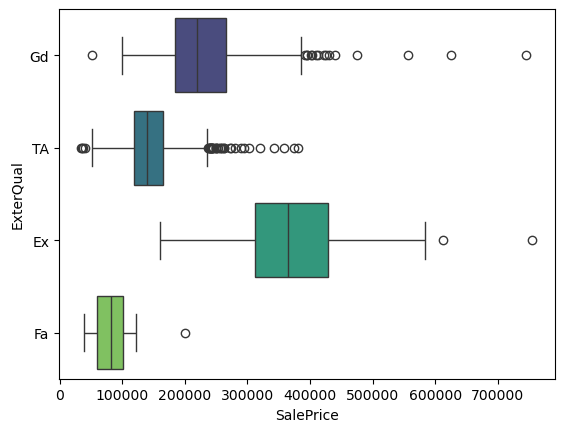

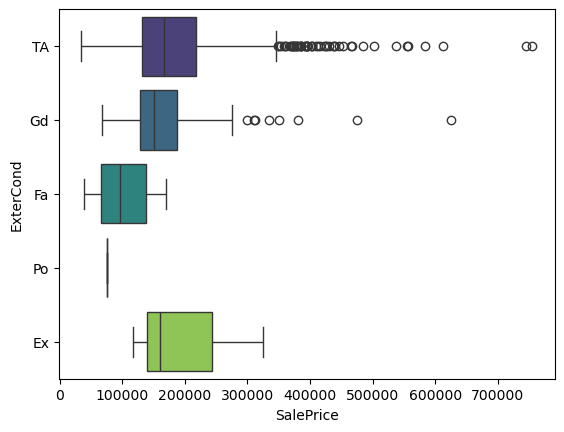

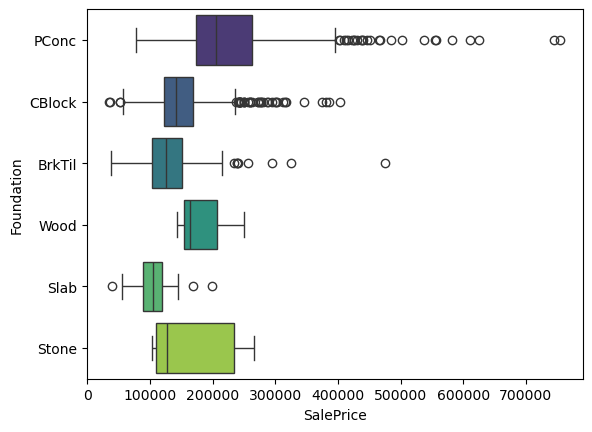

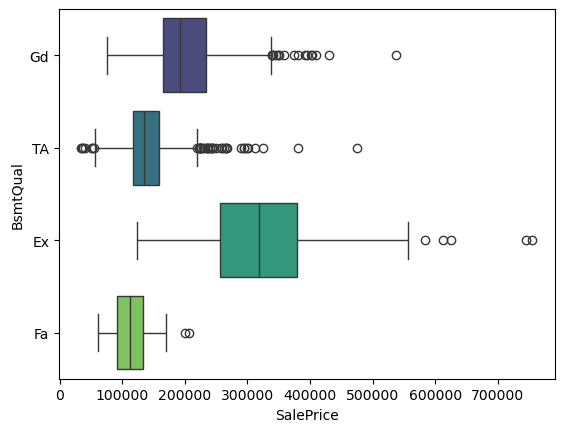

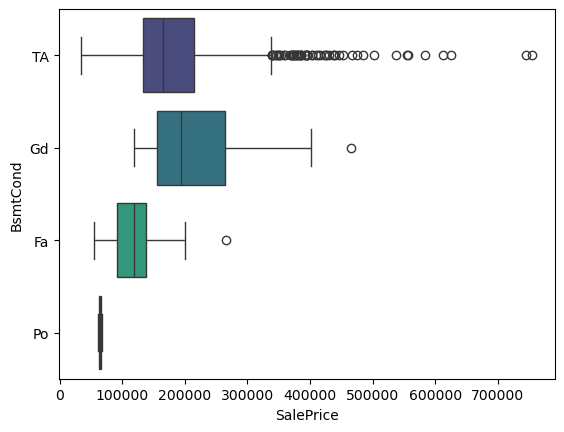

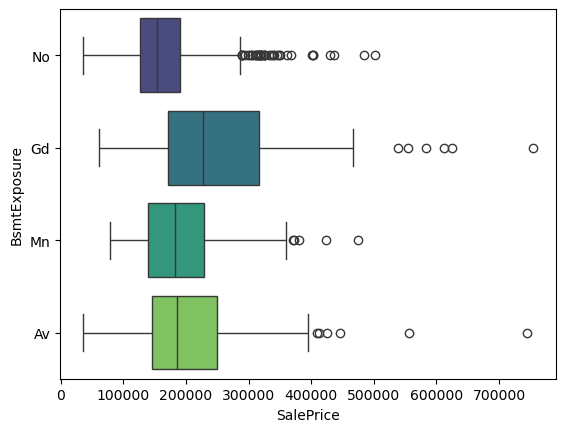

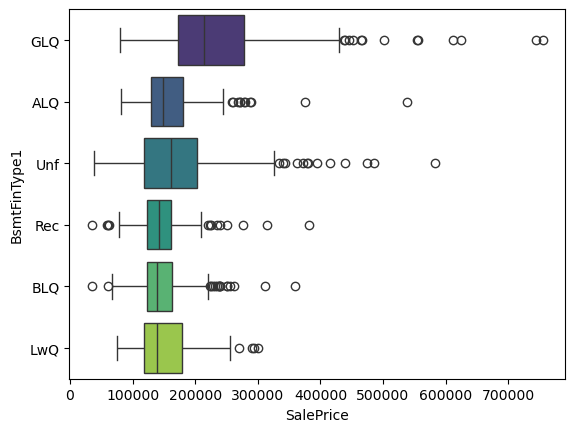

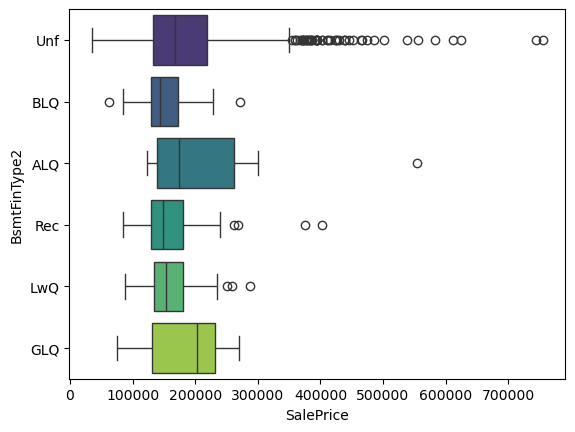

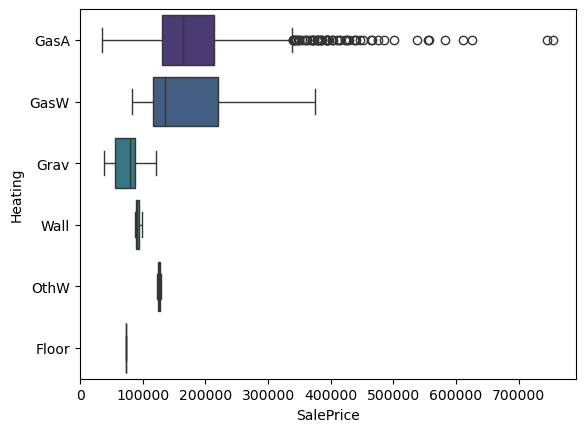

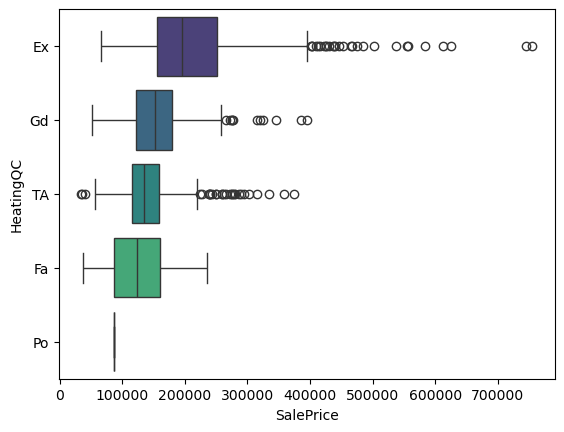

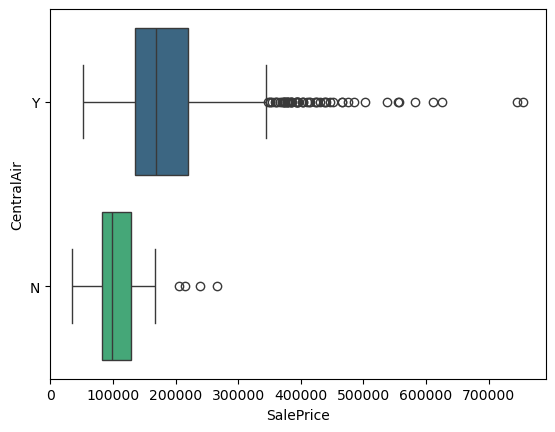

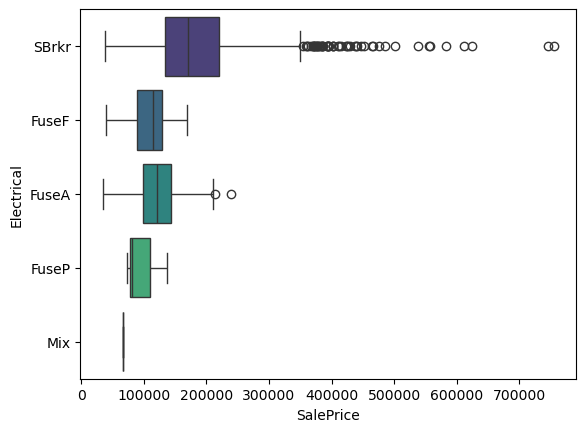

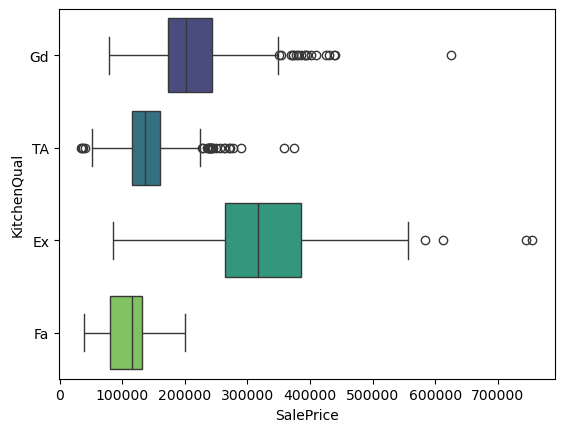

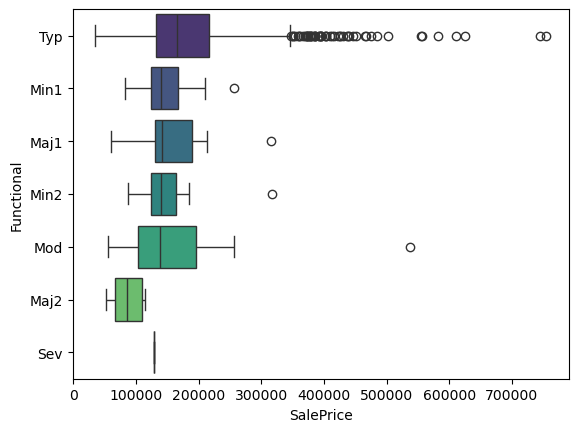

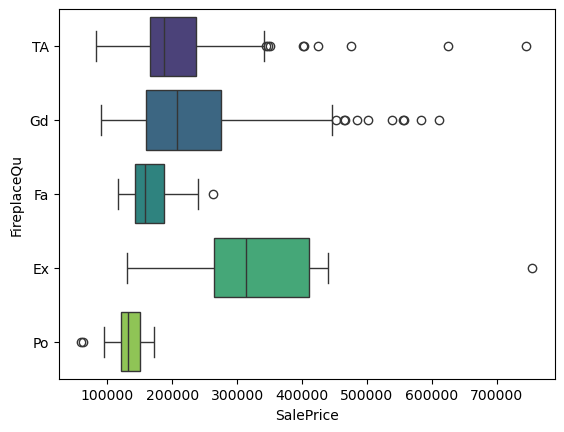

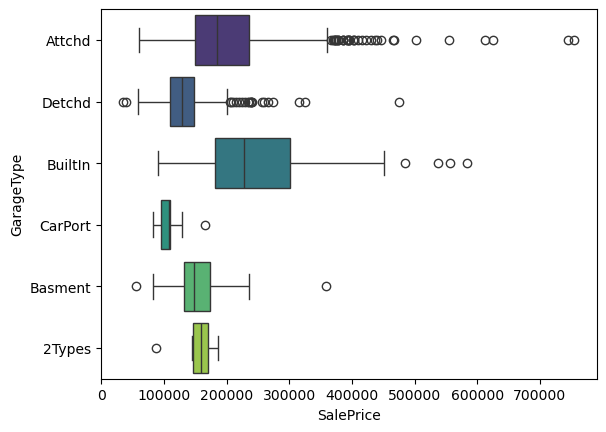

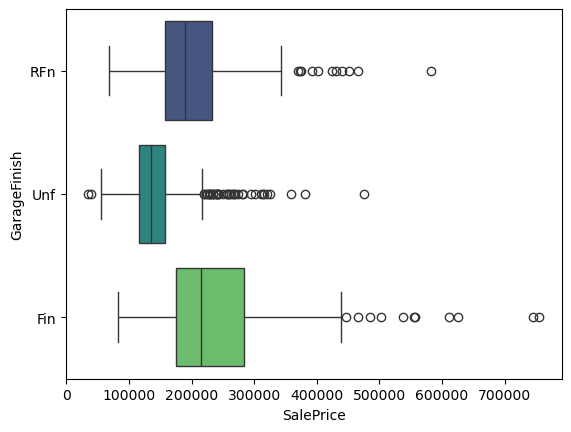

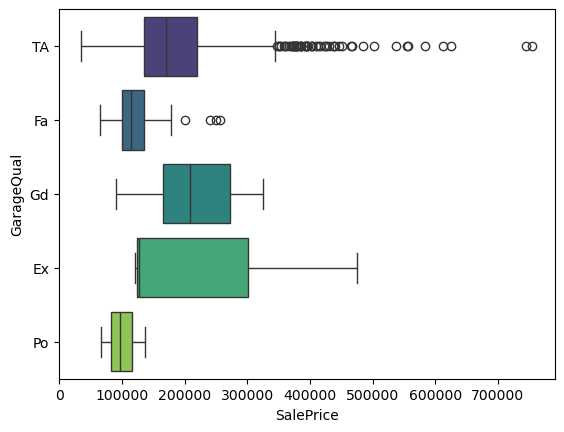

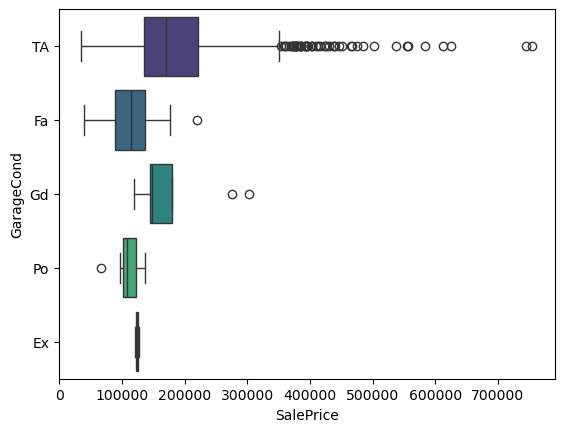

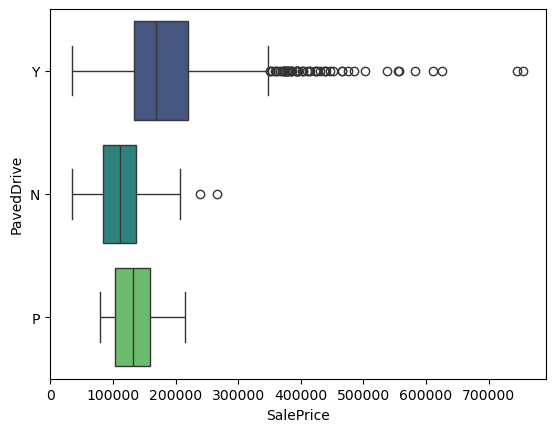

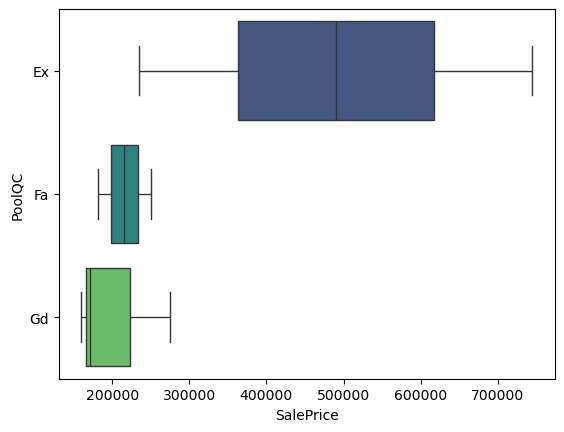

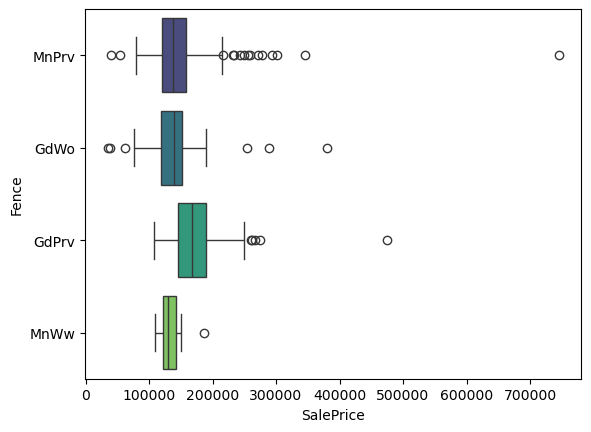

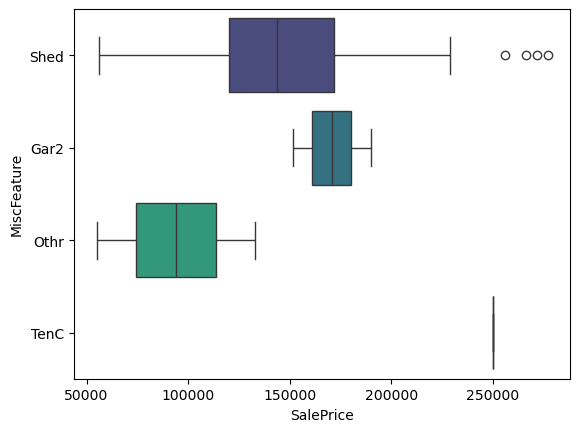

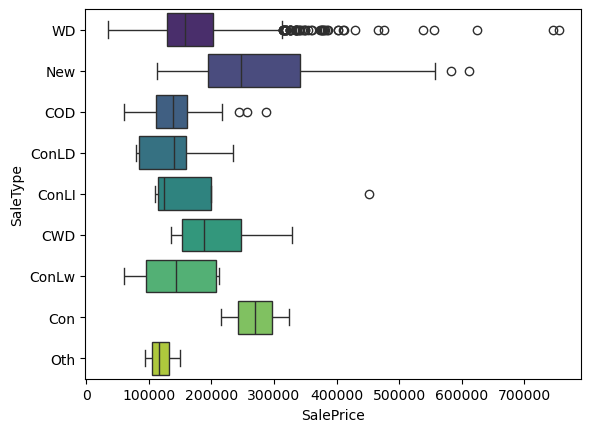

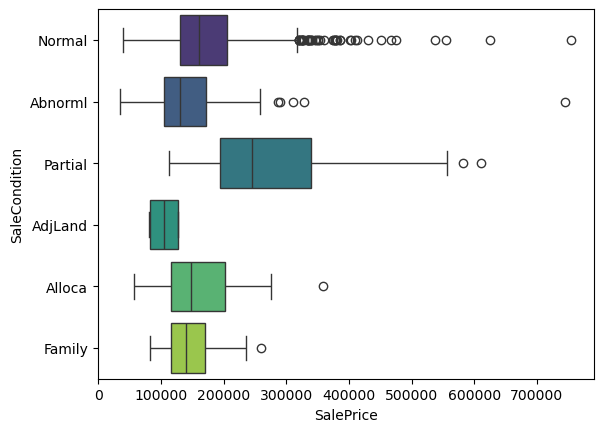

In [36]:
for col in cat_columns:
    draw_boxplot(test_train, col)

Здесь, чтобы увидеть **аномалии**, мы должны увидеть, что боксплоты расположены практически друг напротив друга. Если из наших ранее отобранных колонок выполняется это условие, значит их точно надо **удалить**. 

После просмотра графиков можно сделать вывод, что удалять будем 2 колонки: **Street** и **Utilities**. Напишем к этому код, при этом их еще надо удалить из массива

In [38]:
drop_columns = ['Street', 'Utilities']
test_train.drop(drop_columns, axis=1, inplace=True)
for col in drop_columns:
    del cat_columns[cat_columns.index(col)]

По желанию можно проверить, остались ли у нас эти колонки в датафрейме и в массиве. Пример привел ниже, как это можно сделать. Так же можно просто вывести содержимое массива `cat_columns` и все колонки датафрейма через `.columns`

Если же вы увидите, что эти колонки до сих пор есть в массиве, значит вы банально забыли их удалить оттуда, а если они все еще есть в датафрейме и при этом не было ошибки, что **"данная колонка не найдена в датафрейме"**, то тогда стоит искать ошибку в коде в `test_train.drop` и запускать программу с **шага объединения** датафреймов

In [43]:
print('Street' in test_train.columns)
print('Utilities' in test_train.columns)
print('Street' in cat_columns)
print('Utilities' in cat_columns)

False
False
False
False


Теперь посмотрим на распределение вещественных переменных. Построим график `scatterplot` который покажет зависимость каждого признака со столбцом `SalePrice` 

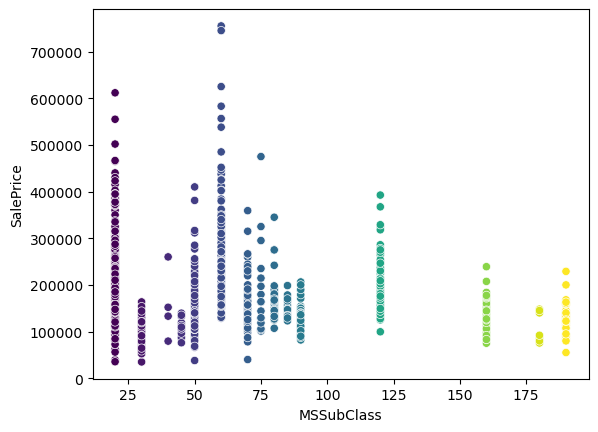

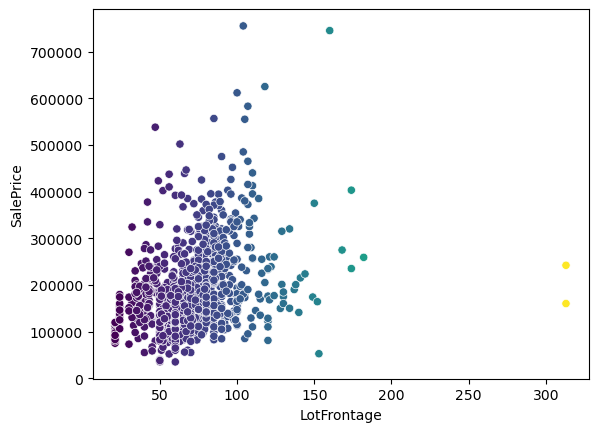

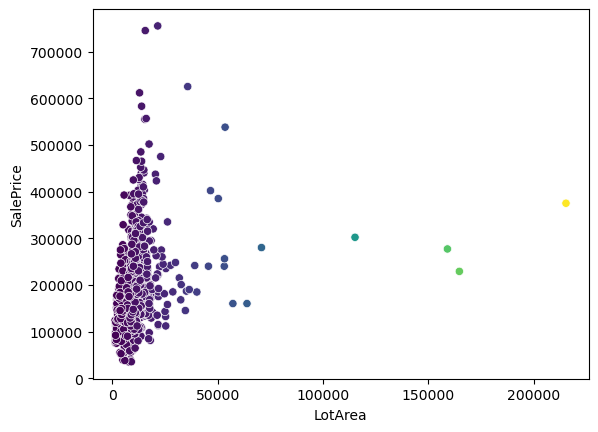

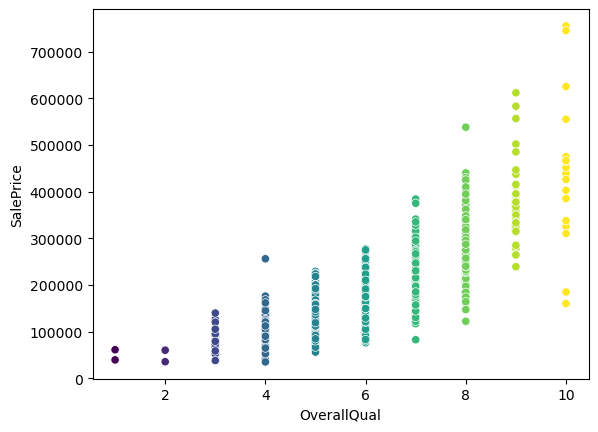

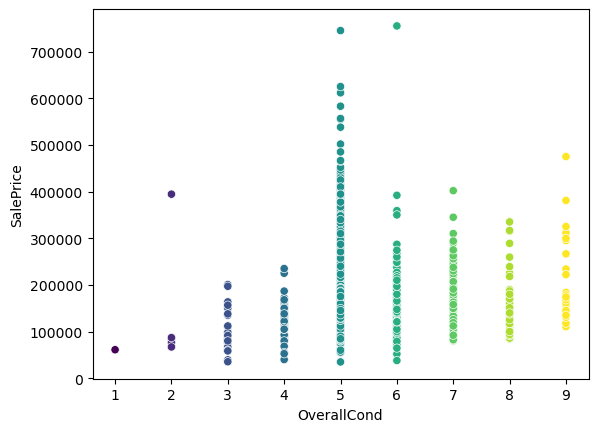

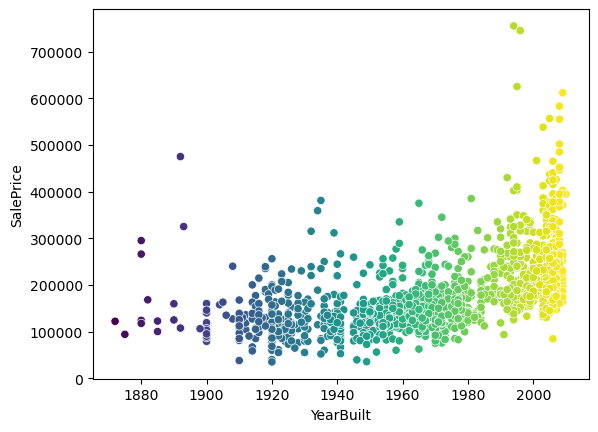

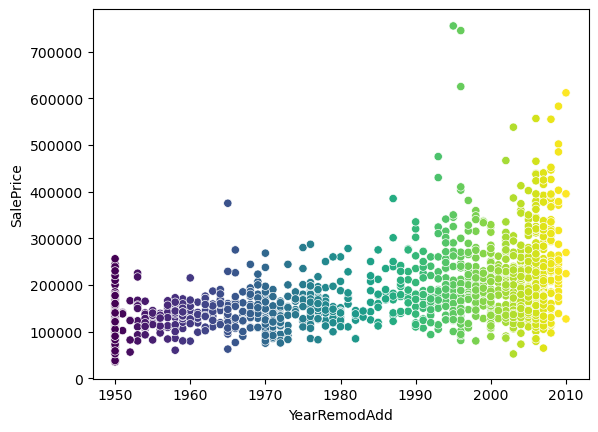

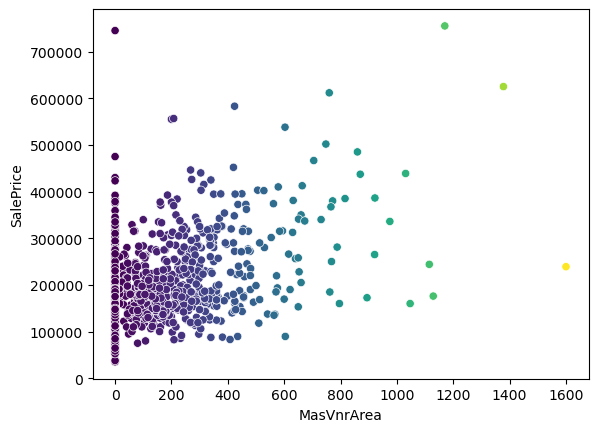

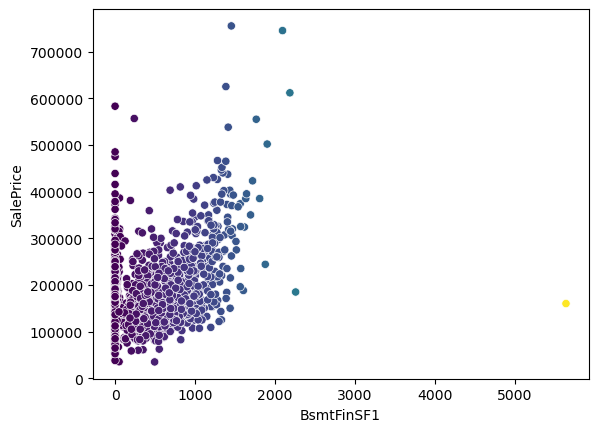

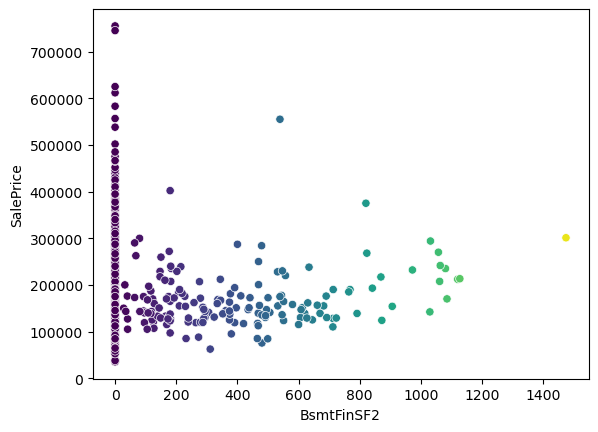

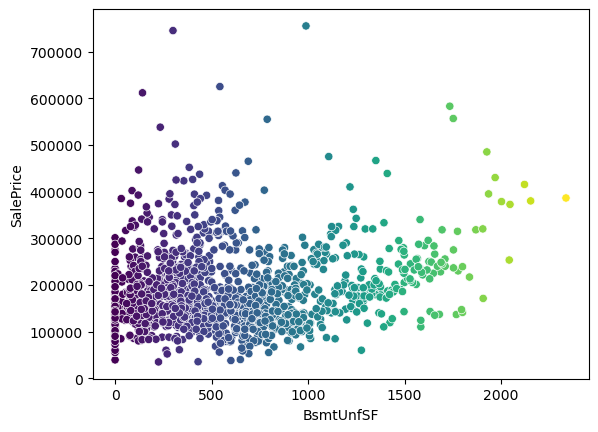

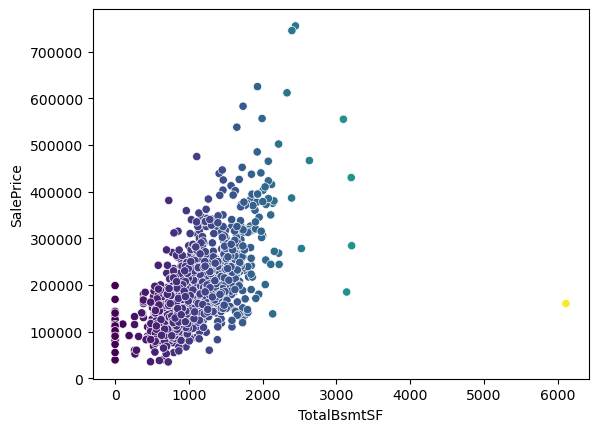

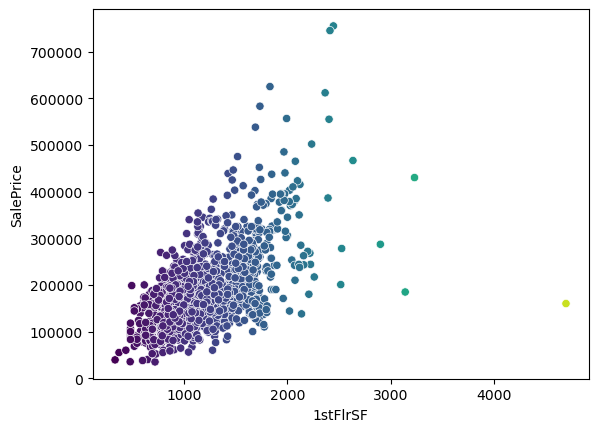

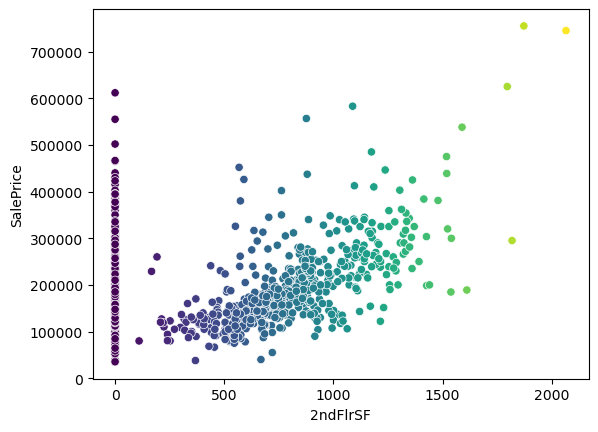

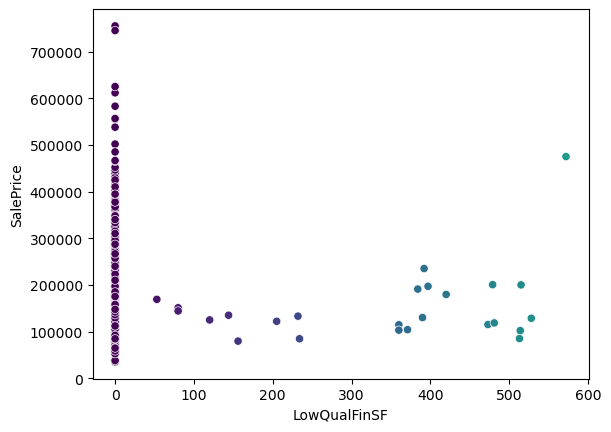

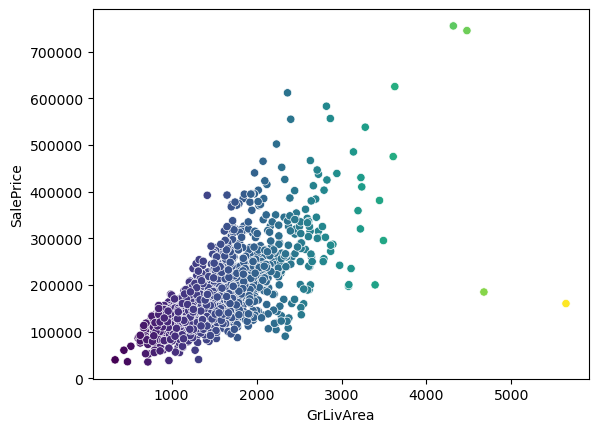

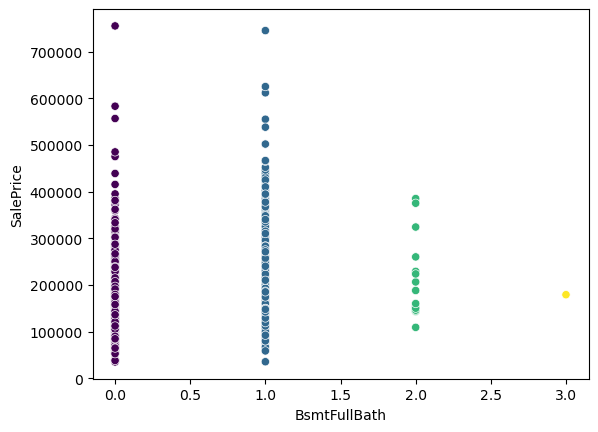

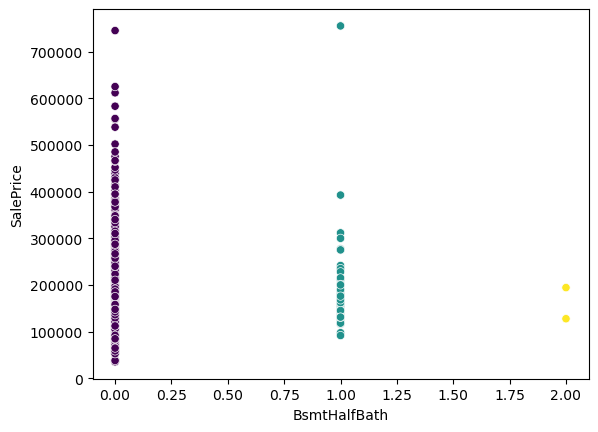

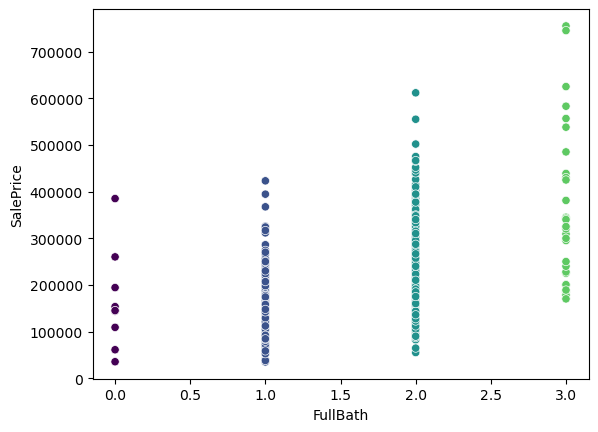

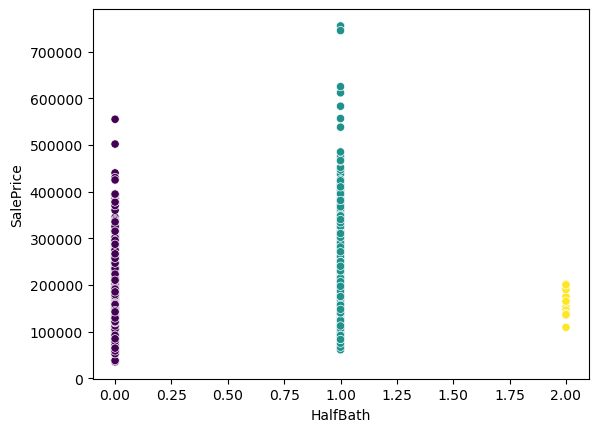

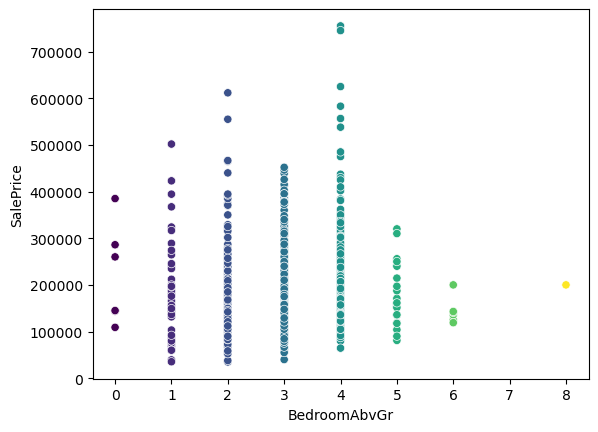

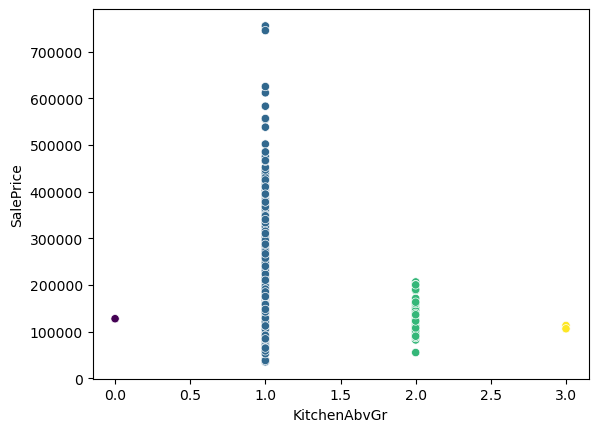

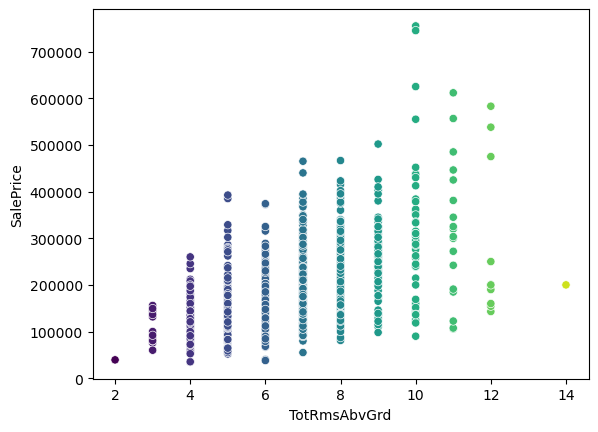

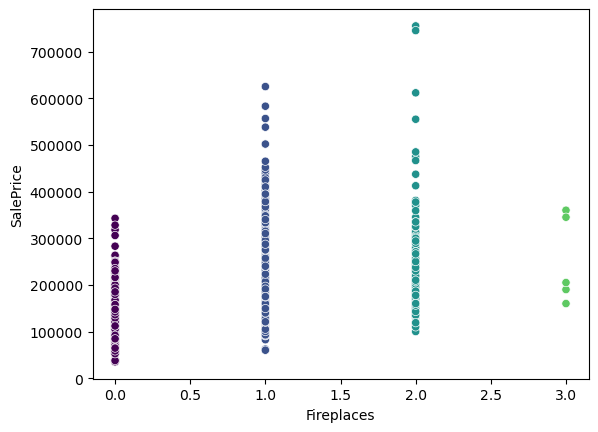

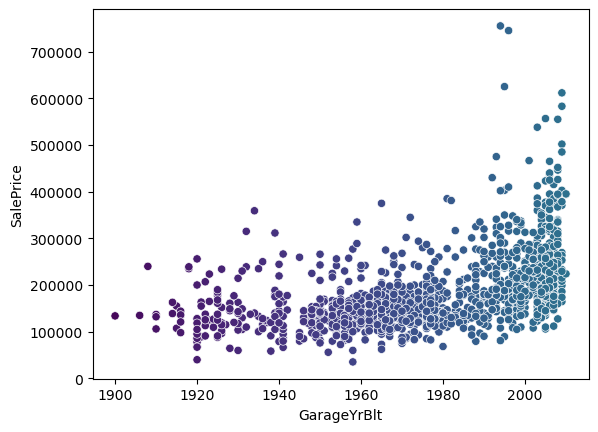

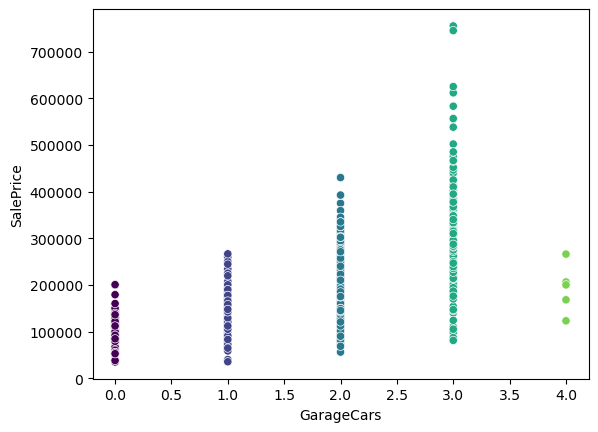

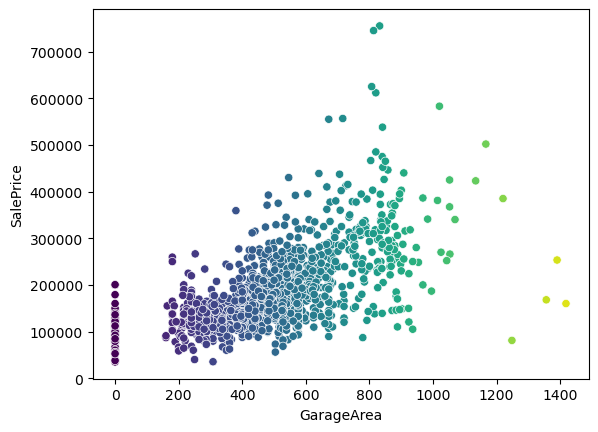

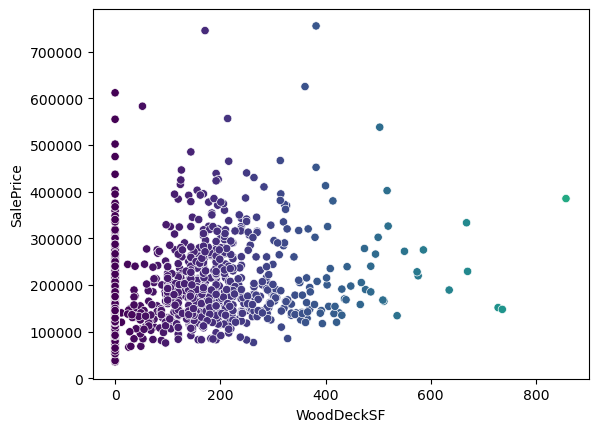

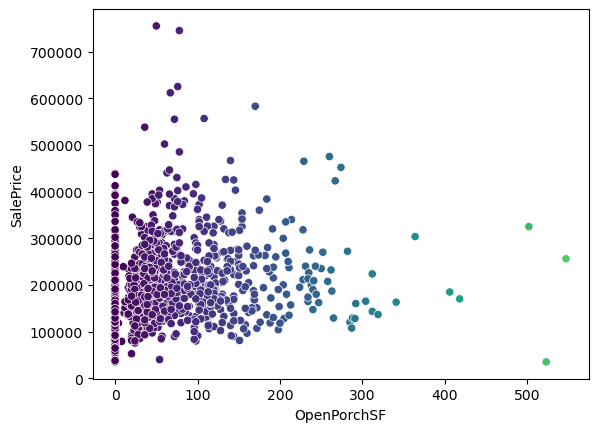

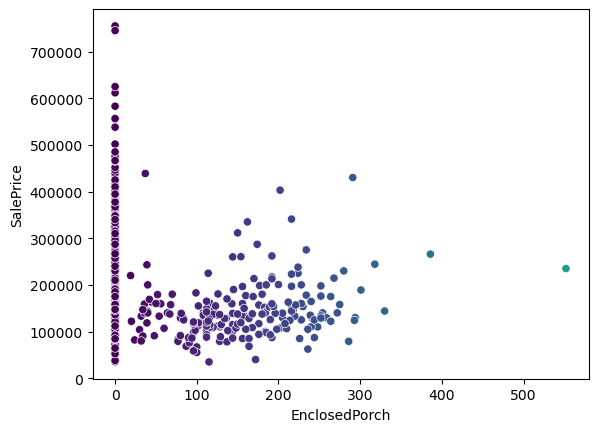

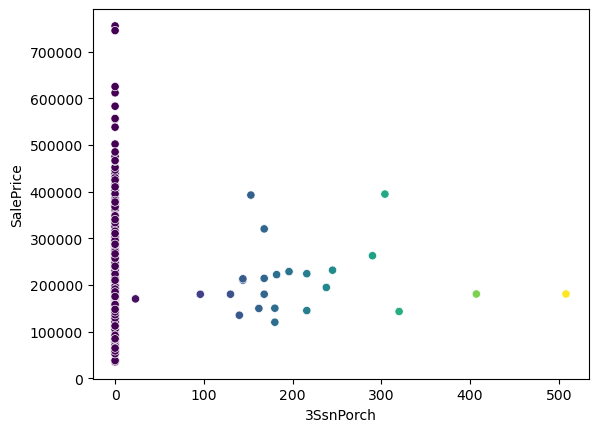

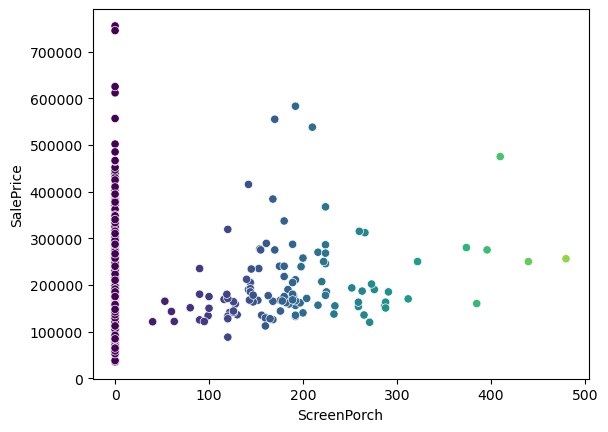

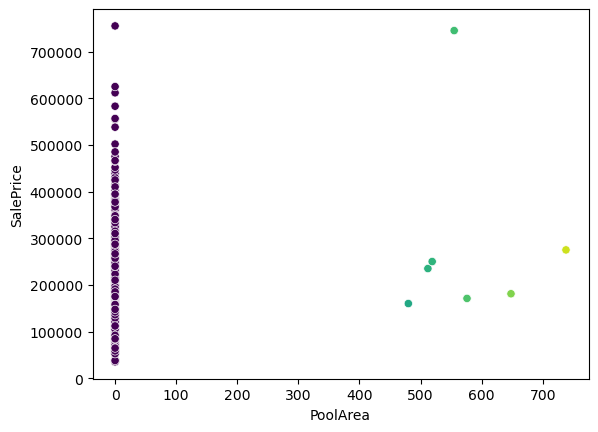

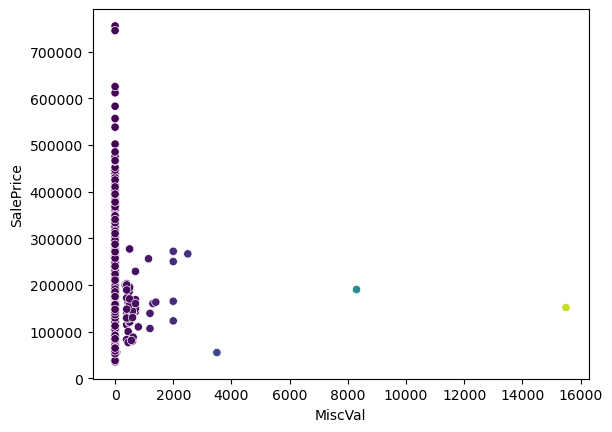

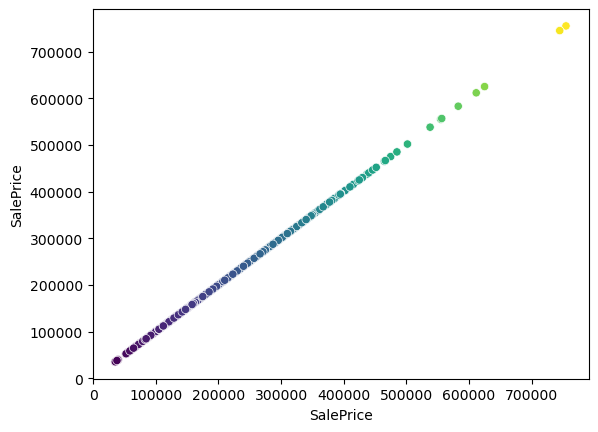

In [46]:
for col in int_float_columns:
    sns.scatterplot(y='SalePrice', x=col, data=test_train, palette='viridis', hue=col, legend=False)
    plt.show()

Далее посчитаем **корреляцию** каждого признака со столбцом `SalePrice`

`Корреляция` - это показатель, насколько 2 признака взаимосвязаны. Чем выше корреляция => тем больше взаимосвязаны признаки

In [48]:
(test_train[int_float_columns].corr())['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

Теперь выберем признаки с **очень низкой корреляцией** и удалим эти признаки из датафрейма. Будем удалять **по принципу**: если **корреляция ниже 0.05**, значит убираем столбец. Стоит отметить, что нам интересен именно **модуль корреляции**, так как смысл знака минус в том, что график прямой будет лежать в других плоскостях.

После этого удалим **найденные элементы** из датафрейма и массива

И проверим, удалились наши колонки из датафрейма и массива так же, как и на **предыдущем шаге**, когда мы удаляли категориальные колонки

In [50]:
low_corr_series = (test_train[int_float_columns].corr())['SalePrice'].sort_values()
low_corr = []
for key, value in dict(low_corr_series).items():
    if abs(value) < 0.05:
        low_corr.append(key)
low_corr

['LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch']

In [51]:
test_train.drop(low_corr, axis=1, inplace=True)
for col in low_corr:
    del int_float_columns[int_float_columns.index(col)]

In [52]:
print(low_corr in int_float_columns)
print('LowQualFinSF' in test_train.columns or 'MiscVal' in test_train.columns or 'BsmtHalfBath' in test_train.columns or
     'BsmtFinSF2' in test_train.columns or '3SsnPorch' in test_train.columns)

False
False


Довольно важно посчитать корреляцию у наших признаков попарно. И пары (стобцы), где корреляция будет **больше 0.9 - удалить из датафрейма**

In [54]:
def make_pairs(df):
    pairs = set()
    columns = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs.add((columns[i], columns[j]))
    return pairs

In [61]:
def correlation(df, n=10):
    a_corr = df.corr().abs().unstack()
    pairs_to_drop = make_pairs(df)
    a_corr = a_corr.drop(pairs_to_drop).sort_values(ascending=False)
    return a_corr[0:n]

In [63]:
correlation(test_train[int_float_columns], n=10)

GarageCars    GarageArea      0.889700
YearBuilt     GarageYrBlt     0.834812
GrLivArea     TotRmsAbvGrd    0.808354
TotalBsmtSF   1stFlrSF        0.801670
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
BedroomAbvGr  TotRmsAbvGrd    0.669737
2ndFlrSF      GrLivArea       0.655085
YearRemodAdd  GarageYrBlt     0.652365
GarageCars    SalePrice       0.640409
dtype: float64

Что ж, нам повезло, таких пар у нас нет

Если посмотреть вывод информации о датафрейме перед всеми предыдущими махинациями, мы увидим, что у нас довольно **много пропусков**, они никуда не делись:) Их надо заполнить. 

Существует несколько вариантов, как это можно сделать, но мы сделаем **следующее**: **категориальные признаки** заполним самым частым значением - **модой**, а **вещественные** - **средним** по стобцу. 

Так же столбцы, где процент пропусков **более 45%** (не берем в счет `SalePrice`) - удаляем

Для начала посчитаем процент пропусков для **категориальных колонок** (`cat_columns`):

In [67]:
((test_train[cat_columns].isnull().sum()) / len(test_train)).sort_values(ascending=False)[0:7]

PoolQC         0.996574
MiscFeature    0.964029
Alley          0.932169
Fence          0.804385
MasVnrType     0.605002
FireplaceQu    0.486468
GarageCond     0.054471
dtype: float64

In [69]:
too_null_series = (test_train[cat_columns].isnull().sum()) / len(test_train)
too_null = []
for key, value in dict(too_null_series).items():
    if value > 0.45:
        too_null.append(key)
test_train.drop(too_null, axis=1, inplace=True)
for col in too_null:
    del cat_columns[cat_columns.index(col)]
((test_train[cat_columns].isnull().sum()) / len(test_train)).sort_values(ascending=False)[0:7]

GarageCond      0.054471
GarageQual      0.054471
GarageFinish    0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
dtype: float64

После удаления заполним колонки самым популярным значением - **модой** и проверим пропуски

In [72]:
for col in cat_columns:
    test_train[col] = test_train[col].fillna(test_train[col].value_counts().index[0])
((test_train[cat_columns].isnull().sum()) / len(test_train)).sort_values(ascending=False)[0:7]

MSZoning        0.0
KitchenQual     0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Heating         0.0
HeatingQC       0.0
CentralAir      0.0
dtype: float64

Теперь у нас нет пропусков в категориальных колонках. Что ж, проделаем то же самое для **вещественных колонок**.

При этом нам стоит учитывать `SalePrice` так как в дальнейшем по этой колонке **мы будем обучать нашу модель**

In [75]:
((test_train[int_float_columns].isnull().sum()) / len(test_train)).sort_values(ascending=False)[0:3]

SalePrice      0.499829
LotFrontage    0.166495
GarageYrBlt    0.054471
dtype: float64

Здесь у нас больше 45% пропусков только в цене. Так как мы объеденили 2 датафрейма для заполнения пропущенных значений, то в этом нет ничего удивительного. Потому что на одном модель у нас **обучается**, а на другом - **тестируется**, поэтому в `test.csv` нет значений в `SalePrice`. 

Поэтому при заполнении пропусков мы просто **не будем учитывать эту колонку**

Теперь заполним пропуски **средним значением** по стобцу

In [78]:
for col in int_float_columns:
    if col != 'SalePrice':
        test_train[col] = test_train[col].fillna(test_train[col].mean())

In [80]:
((test_train[int_float_columns].isnull().sum()) / len(test_train)).sort_values(ascending=False)[0:3]

SalePrice      0.499829
LotFrontage    0.000000
PoolArea       0.000000
dtype: float64

Заметим, что пропусков в нужных нам колонках больше нет.

Теперь уберем **выбросы** из **вещественных колонок**. Для начала построим боксплоты для визуализации распределения данных

  0%|                                                    | 0/30 [00:00<?, ?it/s]

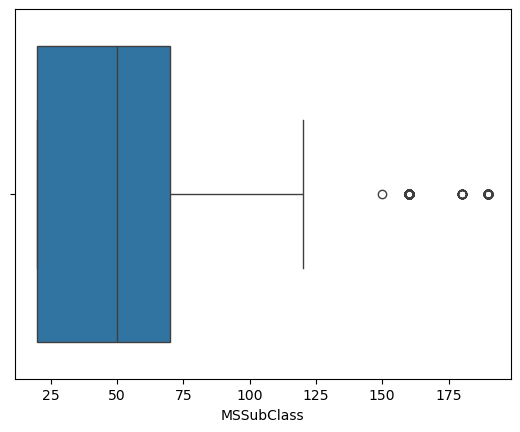

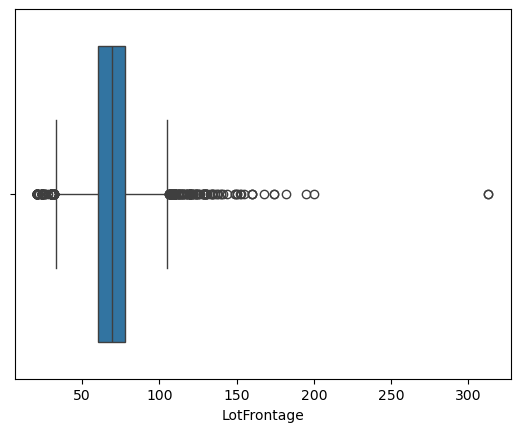

  7%|██▉                                         | 2/30 [00:00<00:02, 13.57it/s]

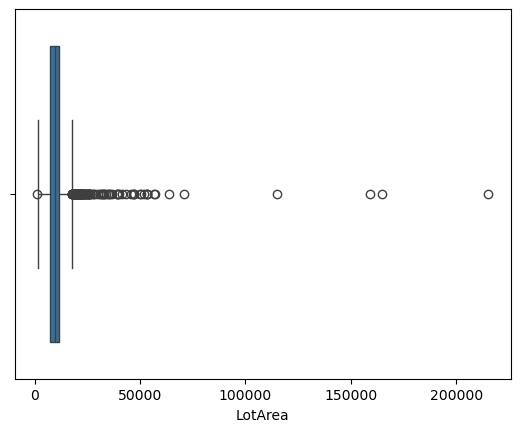

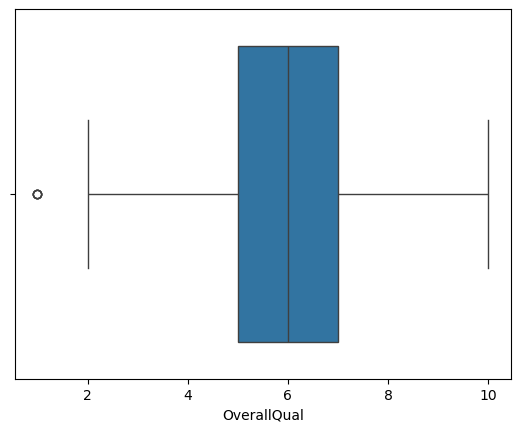

 13%|█████▊                                      | 4/30 [00:00<00:01, 14.28it/s]

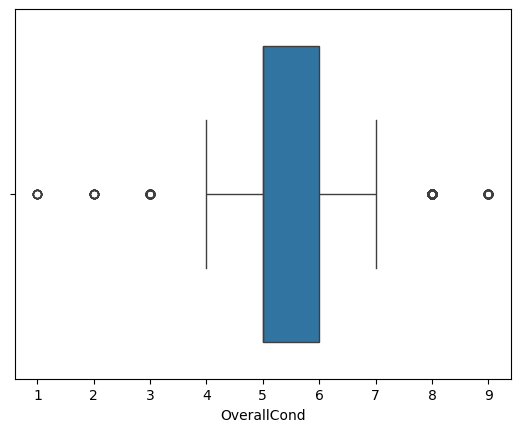

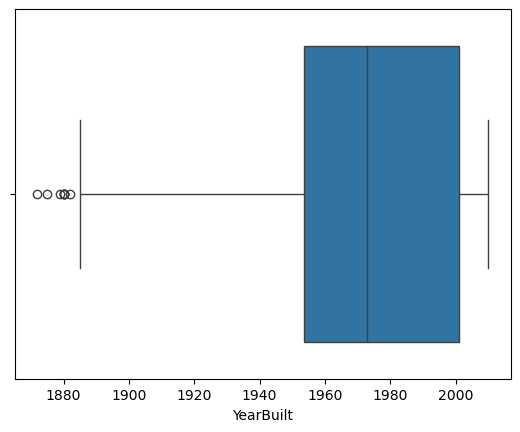

 20%|████████▊                                   | 6/30 [00:00<00:01, 15.74it/s]

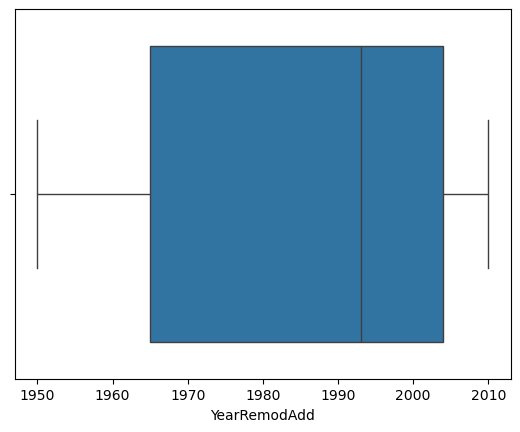

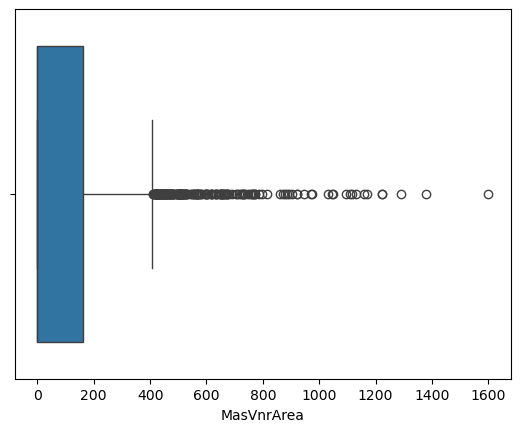

 27%|███████████▋                                | 8/30 [00:00<00:01, 16.66it/s]

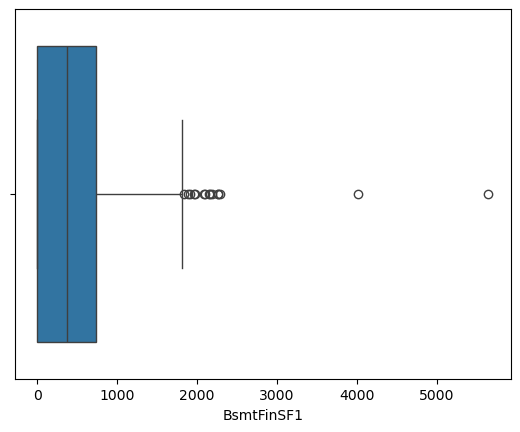

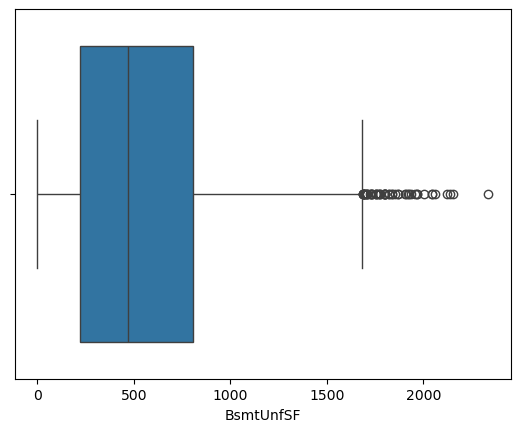

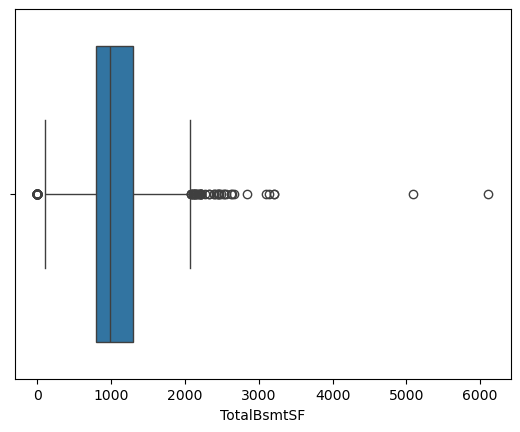

 37%|███████████████▊                           | 11/30 [00:00<00:01, 13.12it/s]

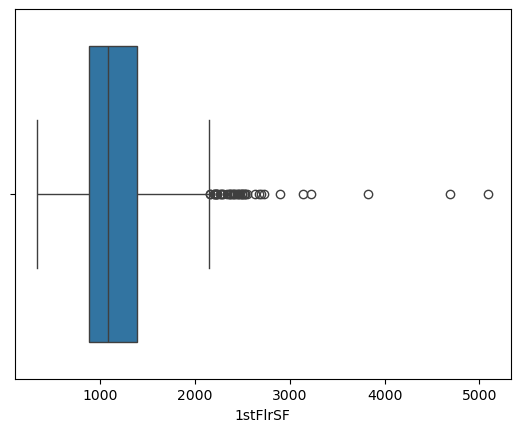

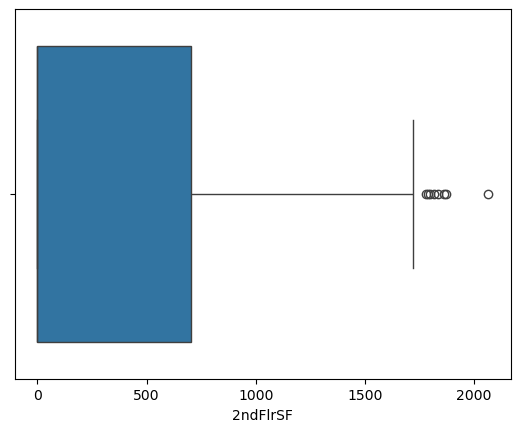

 43%|██████████████████▋                        | 13/30 [00:00<00:01, 14.24it/s]

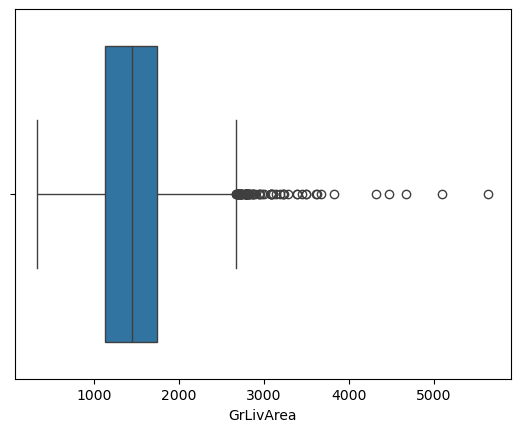

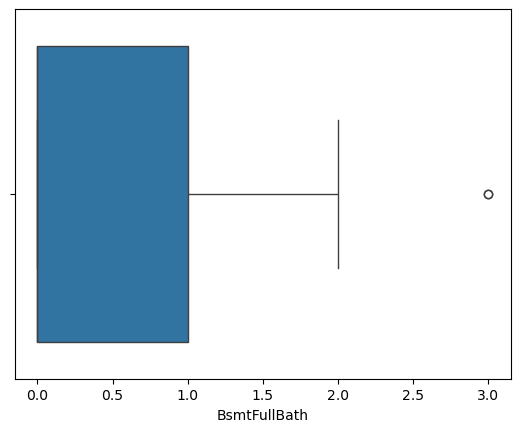

 50%|█████████████████████▌                     | 15/30 [00:01<00:00, 15.35it/s]

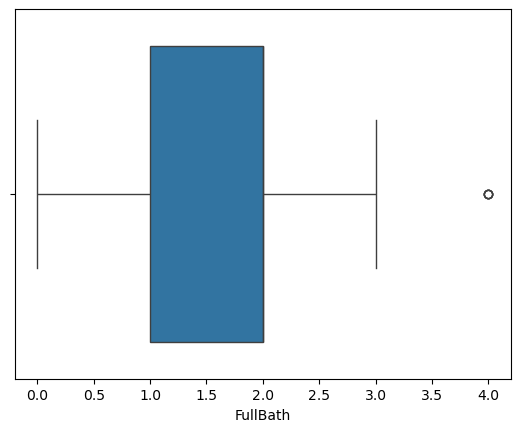

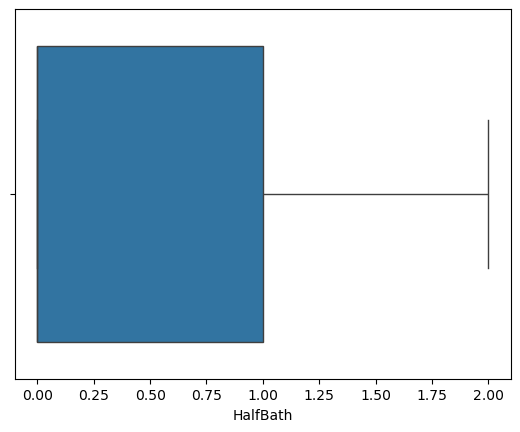

 57%|████████████████████████▎                  | 17/30 [00:01<00:00, 16.24it/s]

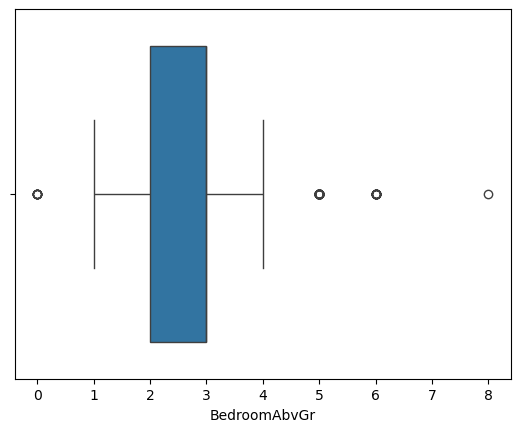

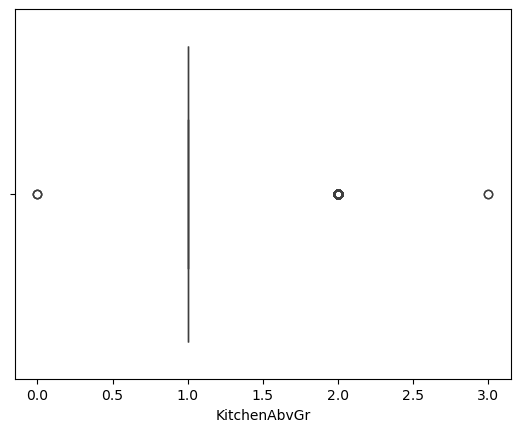

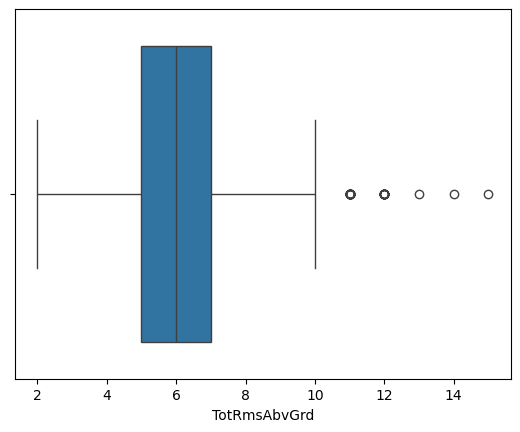

 67%|████████████████████████████▋              | 20/30 [00:01<00:00, 17.65it/s]

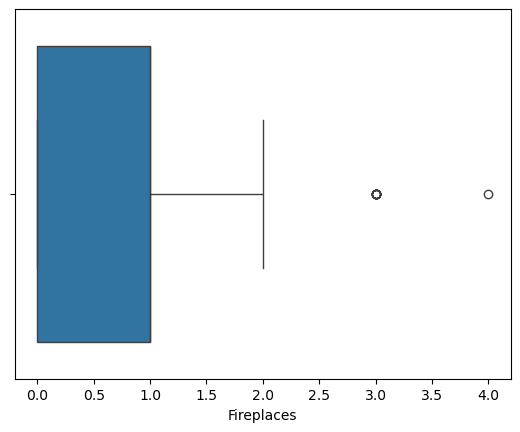

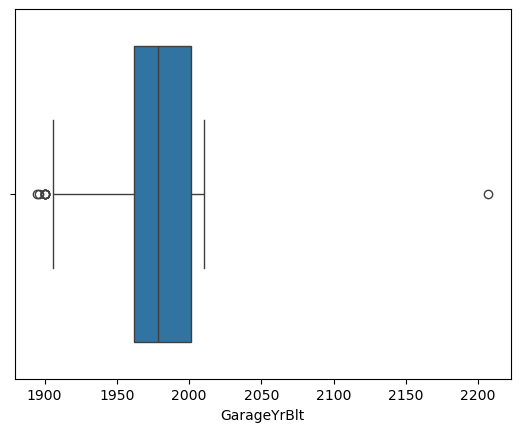

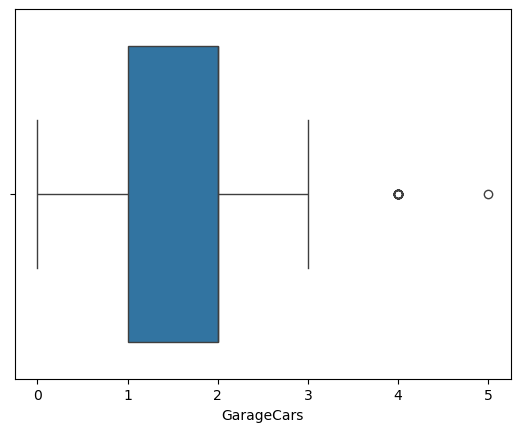

 77%|████████████████████████████████▉          | 23/30 [00:01<00:00, 18.93it/s]

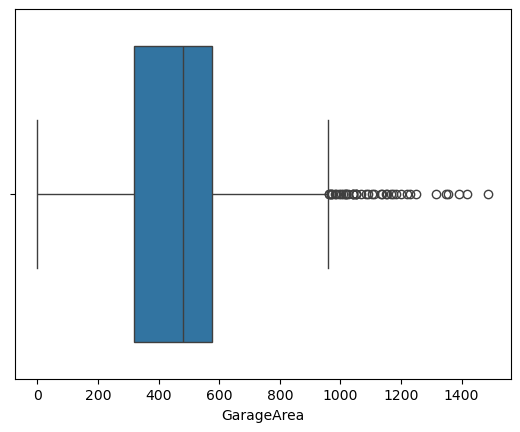

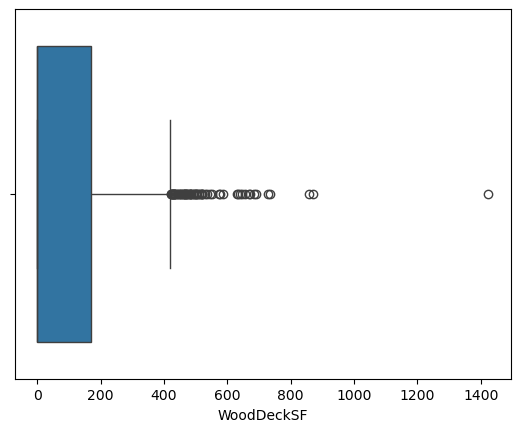

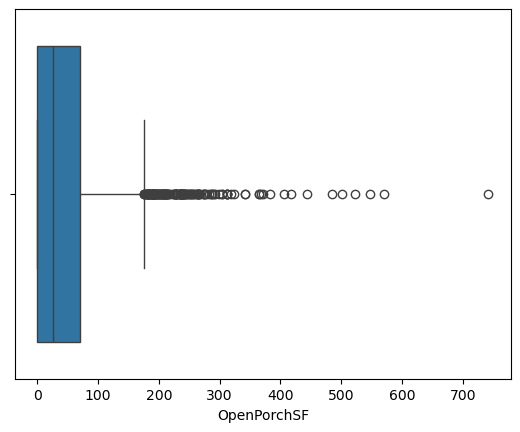

 87%|█████████████████████████████████████▎     | 26/30 [00:01<00:00, 19.17it/s]

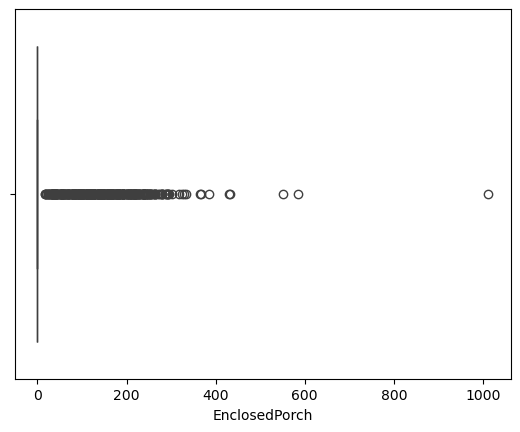

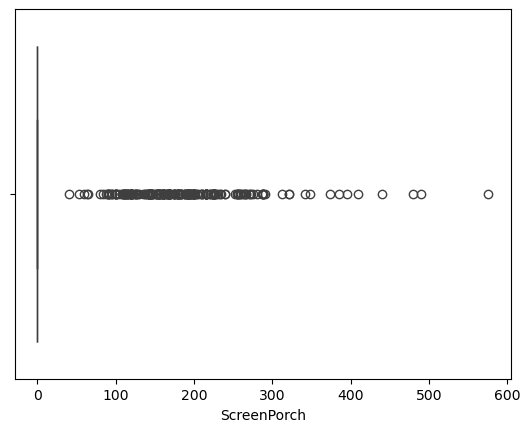

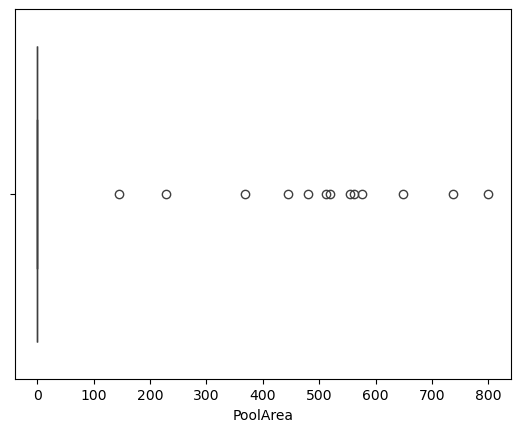

 97%|█████████████████████████████████████████▌ | 29/30 [00:01<00:00, 19.68it/s]

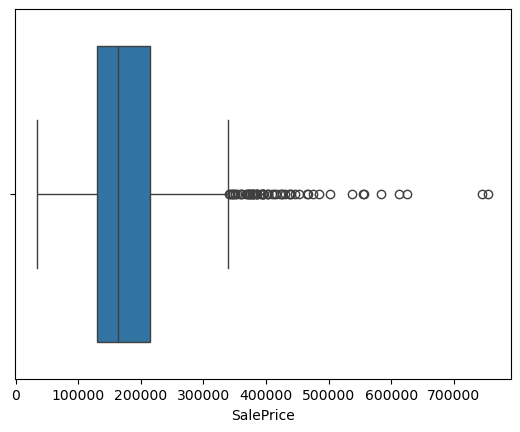

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 17.18it/s]


In [84]:
for col in tqdm(int_float_columns):
    sns.boxplot(data=test_train, x=col)
    plt.show()

Раасмотрев графики, можно заметить довольно **много выбросов**, что может помешать работе нашей модели. Поэтому их надо **убрать**. Мы будем убирать все, что лежит **левеe 0.01 перцентиля** и **правее 0.99 перцентиля** нашего распределения, для этого будем использовать функцию `quantile`

In [86]:
left_bound = 0.01
right_bound = 0.99

test_train_copy = test_train.copy()
print(len(test_train_copy))

for col in int_float_columns:
    if col != 'SalePrice':
        left, right = test_train_copy[col].quantile([left_bound, right_bound])
        test_train_copy = test_train_copy[(test_train_copy[col] >= left - 1) & (test_train_copy[col] <= right + 1)]
        print(f'осталось {len(test_train_copy)} строк')

2919
осталось 2919 строк
осталось 2890 строк
осталось 2842 строк
осталось 2839 строк
осталось 2834 строк
осталось 2805 строк
осталось 2805 строк
осталось 2777 строк
осталось 2752 строк
осталось 2724 строк
осталось 2696 строк
осталось 2643 строк
осталось 2616 строк
осталось 2564 строк
осталось 2562 строк
осталось 2561 строк
осталось 2561 строк
осталось 2561 строк
осталось 2561 строк
осталось 2551 строк
осталось 2551 строк
осталось 2528 строк
осталось 2527 строк
осталось 2502 строк
осталось 2477 строк
осталось 2452 строк
осталось 2427 строк
осталось 2403 строк
осталось 2400 строк


Что ж, мы убрали неприятные выбросы

Теперь нам надо **закодировать категориальные признаки** и разделить обратно датафреймы на **тестовый и тренировочный**.

Мы будем использовать 2 различные кодировки, в зависимости от количества уникальных значений в столбце. 

`One hot encoding` - для тех, где количество уникальных столбцов меньше 6

`Mean target encoding` - в остальных случаях. 

In [91]:
all_cat_columns = large_cat_columns + cat_columns
for col in all_cat_columns:
    if test_train_copy[col].nunique() < 6:
        one_hot_encoding = pd.get_dummies(test_train_copy[col], prefix=col, drop_first=True, dtype="int")
        test_train_copy = pd.concat([test_train_copy, one_hot_encoding], axis=1)
        test_train_copy.drop(col, axis=1, inplace=True)
    else:
        mean_target_encoding = test_train_copy.groupby(col)['SalePrice'].mean()
        test_train_copy[col] = test_train_copy[col].map(mean_target_encoding)

In [93]:
test_train_copy.head(3)

MSSubClass  LotFrontage  LotArea   Neighborhood     Condition1  \
Id                                                                   
1           60         65.0     8450  193562.333333  172579.094556   
2           20         80.0     9600  213055.555556  141297.955882   
3           60         68.0    11250  193562.333333  172579.094556   

       Condition2     HouseStyle  OverallQual  OverallCond  YearBuilt  ...  \
Id                                                                     ...   
1   169601.131997  197411.994318            7            5       2003  ...   
2   169601.131997  164390.432079            6            8       1976  ...   
3   169601.131997  197411.994318            7            5       2001  ...   

    GarageQual_Fa  GarageQual_Gd  GarageQual_Po  GarageQual_TA  GarageCond_Fa  \
Id                                                                              
1               0              0              0              1              0   
2               0              0              0              1              0   
3               0              0              0              1              0   

    GarageCond_Gd  GarageCond_Po  GarageCond_TA  PavedDrive_P  PavedDrive_Y  
Id                                                                           
1               0              0              1             0             1  
2               0              0              1             0             1  
3               0              0              1             0             1  

[3 rows x 109 columns]

In [95]:
train = test_train_copy[~test_train_copy['SalePrice'].isnull()]
train.head()

MSSubClass  LotFrontage  LotArea   Neighborhood     Condition1  \
Id                                                                   
1           60         65.0     8450  193562.333333  172579.094556   
2           20         80.0     9600  213055.555556  141297.955882   
3           60         68.0    11250  193562.333333  172579.094556   
5           60         84.0    14260  278042.727273  172579.094556   
6           50         85.0    14115  154414.454545  172579.094556   

       Condition2     HouseStyle  OverallQual  OverallCond  YearBuilt  ...  \
Id                                                                     ...   
1   169601.131997  197411.994318            7            5       2003  ...   
2   169601.131997  164390.432079            6            8       1976  ...   
3   169601.131997  197411.994318            7            5       2001  ...   
5   169601.131997  197411.994318            8            5       2000  ...   
6   169601.131997  134325.205882            5            5       1993  ...   

    GarageQual_Fa  GarageQual_Gd  GarageQual_Po  GarageQual_TA  GarageCond_Fa  \
Id                                                                              
1               0              0              0              1              0   
2               0              0              0              1              0   
3               0              0              0              1              0   
5               0              0              0              1              0   
6               0              0              0              1              0   

    GarageCond_Gd  GarageCond_Po  GarageCond_TA  PavedDrive_P  PavedDrive_Y  
Id                                                                           
1               0              0              1             0             1  
2               0              0              1             0             1  
3               0              0              1             0             1  
5               0              0              1             0             1  
6               0              0              1             0             1  

[5 rows x 109 columns]

In [128]:
test = test_train_copy[test_train_copy['SalePrice'].isnull()]
test.head(3)

MSSubClass  LotFrontage  LotArea   Neighborhood     Condition1  \
Id                                                                     
1461          20         80.0    11622  139804.965000  141297.955882   
1462          20         81.0    14267  139804.965000  172579.094556   
1463          60         74.0    13830  191165.929577  172579.094556   

         Condition2     HouseStyle  OverallQual  OverallCond  YearBuilt  ...  \
Id                                                                       ...   
1461  169601.131997  164390.432079            5            6       1961  ...   
1462  169601.131997  164390.432079            6            6       1958  ...   
1463  169601.131997  197411.994318            5            5       1997  ...   

      GarageQual_Fa  GarageQual_Gd  GarageQual_Po  GarageQual_TA  \
Id                                                                 
1461              0              0              0              1   
1462              0              0              0              1   
1463              0              0              0              1   

      GarageCond_Fa  GarageCond_Gd  GarageCond_Po  GarageCond_TA  \
Id                                                                 
1461              0              0              0              1   
1462              0              0              0              1   
1463              0              0              0              1   

      PavedDrive_P  PavedDrive_Y  
Id                                
1461             0             1  
1462             0             1  
1463             0             1  

[3 rows x 109 columns]

После всех этих шагов мы можем приступать к обучению нашей модели, использую все данные!

In [120]:
train.to_csv('train_transform.csv')
test.to_csv('test_transform.csv')